In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install librosa

In [4]:
import librosa
from librosa import display

In [5]:
test_audio_file = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav'

In [6]:
data, sampling_rate = librosa.load(test_audio_file,sr=44100)

In [7]:
sampling_rate

44100

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


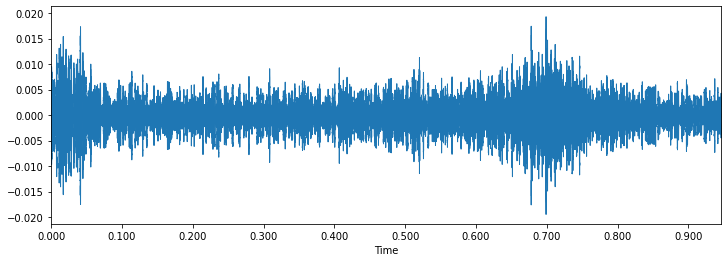

In [8]:
% pylab inline
import os
import pandas as pd
import glob
plt.figure(figsize=(12,4))
librosa.display.waveplot(data[44100:],sr=sampling_rate)

In [9]:
data.shape

(85800,)

(20, 18)


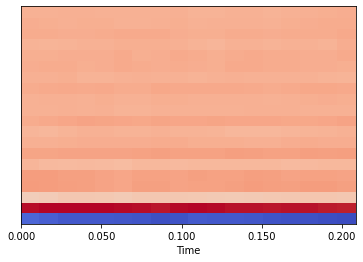

In [10]:
mfccs = librosa.feature.mfcc(data[1000:10000], sr=sampling_rate)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

(20, 20)


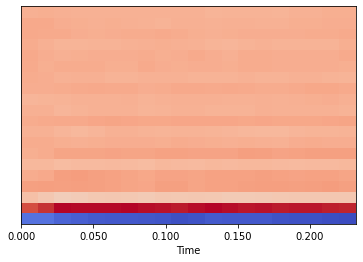

In [11]:
mfccs = librosa.feature.mfcc(data[:10000], sr=sampling_rate)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

In [12]:
import IPython.display as ipd

In [13]:
ipd.Audio(test_audio_file)

In [14]:
import re

# first test with one file
test_path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/dialog/EmoEvaluation/Ses01F_impro01.txt'

In [15]:
file_regex = re.compile(r'\[.+\]\n', re.IGNORECASE)

In [16]:
with open(test_path) as fptr:
    test_file_content = fptr.read()
    
info_lines = re.findall(file_regex, test_file_content)

In [17]:
for l in info_lines[1:10]:
    print(l.strip().split('\t'))

['[6.2901 - 8.2357]', 'Ses01F_impro01_F000', 'neu', '[2.5000, 2.5000, 2.5000]']
['[10.0100 - 11.3925]', 'Ses01F_impro01_F001', 'neu', '[2.5000, 2.5000, 2.5000]']
['[14.8872 - 18.0175]', 'Ses01F_impro01_F002', 'neu', '[2.5000, 2.5000, 2.5000]']
['[19.2900 - 20.7875]', 'Ses01F_impro01_F003', 'xxx', '[2.5000, 3.0000, 3.0000]']
['[21.3257 - 24.7400]', 'Ses01F_impro01_F004', 'xxx', '[2.5000, 3.0000, 2.5000]']
['[27.4600 - 31.4900]', 'Ses01F_impro01_F005', 'neu', '[2.5000, 3.5000, 2.0000]']
['[38.9650 - 43.5900]', 'Ses01F_impro01_F006', 'fru', '[2.0000, 3.5000, 3.5000]']
['[46.5800 - 52.1900]', 'Ses01F_impro01_F007', 'fru', '[2.5000, 3.5000, 3.5000]']
['[56.1600 - 58.8225]', 'Ses01F_impro01_F008', 'fru', '[2.0000, 3.5000, 3.5000]']


In [18]:
# import re
# import os


# file_regex = re.compile(r'\[.+\]\n', re.IGNORECASE)

# start_times, end_times, wav_file_names, emotions, vals, acts, doms = [], [], [], [], [], [], []

# for sess in range(1, 6):
#     emo_evaluation_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session{}/dialog/EmoEvaluation/'.format(sess)
#     evaluation_files = [l for l in os.listdir(emo_evaluation_dir) if 'Ses' in l]
#     for file in evaluation_files:
#         with open(emo_evaluation_dir + file) as f:
#             content = f.read()
#         info_lines = re.findall(file_regex, content)
#         for line in info_lines[1:]:  # the first line is a header
#             start_end_time, wav_file_name, emotion, val_act_dom = line.strip().split('\t')
#             start_time, end_time = start_end_time[1:-1].split('-')
#             val, act, dom = val_act_dom[1:-1].split(',')
#             val, act, dom = float(val), float(act), float(dom)
#             start_time, end_time = float(start_time), float(end_time)
#             start_times.append(start_time)
#             end_times.append(end_time)
#             wav_file_names.append(wav_file_name)
#             emotions.append(emotion)
#             vals.append(val)
#             acts.append(act)
#             doms.append(dom)

In [19]:
import pandas as pd

# df_iemocap = pd.DataFrame(columns=['start_time', 'end_time', 'wav_file', 'emotion', 'val', 'act', 'dom'])

# df_iemocap['start_time'] = start_times
# df_iemocap['end_time'] = end_times
# df_iemocap['wav_file'] = wav_file_names
# df_iemocap['emotion'] = emotions
# df_iemocap['val'] = vals
# df_iemocap['act'] = acts
# df_iemocap['dom'] = doms

# df_iemocap.tail()

In [20]:
#df_iemocap.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv', index=False)

In [21]:
df_iemocap=pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')

In [22]:
df_iemocap

,start_time,end_time,wav_file,emotion,val,act,dom
0,15.14,17.2100,Ses01F_script02_1_F000,neu,2.5,2.0,2.0
1,25.91,27.4125,Ses01F_script02_1_F001,fru,2.5,2.0,2.5
2,38.99,40.0500,Ses01F_script02_1_F002,xxx,2.0,2.0,2.5
3,45.06,47.0300,Ses01F_script02_1_F003,sur,2.5,3.0,3.0
4,49.22,51.4000,Ses01F_script02_1_F004,neu,2.0,3.0,3.0
...,...,...,...,...,...,...,...
10034,158.43,161.2200,Ses05F_impro01_M020,fru,2.0,3.5,3.5
10035,163.35,167.6700,Ses05F_impro01_M021,fru,2.0,3.5,4.0
10036,168.59,170.8100,Ses05F_impro01_M022,xxx,3.0,3.5,4.0
10037,173.52,179.8400,Ses05F_impro01_M023,fru,2.0,4.0,4.5


In [23]:
### Audio files

In [24]:
# Try for one file first
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [25]:
test_file_path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/dialog/wav/Ses01F_impro01.wav'

y, sr = librosa.load(test_file_path, sr=44100)
y, sr

(array([ 0.42572615,  0.48587543,  0.37312022, ..., -0.31514615,
        -0.16263676,  0.        ], dtype=float32), 44100)

In [26]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')
iemocap_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/'

In [27]:
# sr = 44100
# audio_vectors = {}
# for sess in [5]:  # using one session due to memory constraint, can replace [5] with range(1, 6)
#     wav_file_path = '{}Session{}/dialog/wav/'.format(iemocap_dir, sess)
#     orig_wav_files = os.listdir(wav_file_path)
#     for orig_wav_file in tqdm(orig_wav_files):
#         try:
#             orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
#             orig_wav_file, file_format = orig_wav_file.split('.')
#             for index, row in labels_df[labels_df['wav_file'].str.contains(orig_wav_file)].iterrows():
#                 start_time, end_time, truncated_wav_file_name, emotion, val, act, dom = row['start_time'], row['end_time'], row['wav_file'], row['emotion'], row['val'], row['act'], row['dom']
#                 start_frame = math.floor(start_time * sr)
#                 end_frame = math.floor(end_time * sr)
#                 truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]
#                 audio_vectors[truncated_wav_file_name] = truncated_wav_vector
#         except:
#             print('An exception occured for {}'.format(orig_wav_file))
#     with open('/content/drive/My Drive/IEMOCAP/pre-processed/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
#         pickle.dump(audio_vectors, f)

In [28]:
# sess = 5
# with open('/content/drive/My Drive/IEMOCAP/pre-processed/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
#         pickle.dump(audio_vectors, f)

In [29]:
import os
import pickle
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import librosa
import math
import random
import pandas as pd
import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [30]:
#!pip install opensmile --upgrade

In [31]:
data_dir = '/content/drive/My Drive/IEMOCAP/pre-processed/'
labels_df_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_1.pkl'.format(data_dir)

In [32]:
labels_df = pd.read_csv(labels_df_path)
audio_vectors = pickle.load(open(audio_vectors_path, 'rb'))

In [33]:
random_file_name = list(audio_vectors.keys())[random.choice(range(len(audio_vectors.keys())))]
y = audio_vectors[random_file_name]
sr = 44100

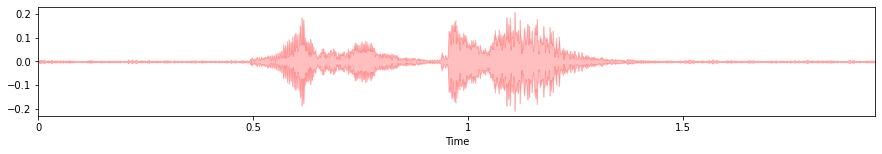

In [34]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y, sr=sr, max_sr=1000, alpha=0.25, color='r')

In [35]:
#!pip install sox --upgrade

In [36]:
#!apt -qq install -y sox

In [37]:
# import opensmile
# smile = opensmile.Smile(
#     feature_set=opensmile.FeatureSet.ComParE_2016,
#     feature_level=opensmile.FeatureLevel.Functionals,
# )

In [38]:
#test_opensmile_file_path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav'

In [39]:
#!apt install ffmpeg

In [40]:
#import joblib

In [41]:
#test_opensmile_df = smile.process_files(test_opensmile_file_path)
#test_opensmile_df = smile.process_files(test_audio_file)

In [42]:
y[-30000:]

array([-0.00627976, -0.00644061, -0.006285  , ..., -0.00167774,
       -0.00183899, -0.00195088], dtype=float32)

In [43]:
print('Signal mean = {:.5f}'.format(np.mean(abs(y[:40000]))))
print('Signal std dev = {:.5f}'.format(np.std(y[:40000])))

Signal mean = 0.00905
Signal std dev = 0.01784


In [44]:
print('Signal mean = {:.5f}'.format(np.mean(abs(y[-40000:]))))
print('Signal std dev = {:.5f}'.format(np.std(y[-40000:])))

Signal mean = 0.01152
Signal std dev = 0.02602


In [45]:
print('Signal mean = {:.5f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.5f}'.format(np.std(y)))

Signal mean = 0.01161
Signal std dev = 0.02431


In [46]:
random_file_name

'Ses01F_script02_1_F014'

In [47]:
#ipd.Audio(y)

RMSE mean = 0.01145
RMSE std dev = 0.01356


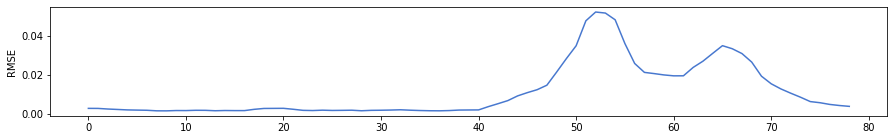

In [48]:
rmse = librosa.feature.rms(y[:40000] + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMSE mean = {:.5f}'.format(np.mean(rmse)))
print('RMSE std dev = {:.5f}'.format(np.std(rmse)))

In [49]:
from IPython.display import Audio
Audio(y[:], rate=44100)

In [50]:
silence = 0
for e in rmse:
    if e <= 0.4 * np.mean(rmse):
        silence += 1
print(silence/float(len(rmse)))

0.5569620253164557


In [51]:
y_harmonic, y_percussive = librosa.effects.hpss(y[:40000])
np.mean(y_harmonic)

-1.0659535e-05

In [52]:
autocorr = librosa.core.autocorrelate(y[:40000])
np.max(autocorr)

12.73750668469939

In [53]:
cl = 0.45 * np.mean(abs(y[:40000]))
center_clipped = []
for s in y:
    if s >= cl:
        center_clipped.append(s - cl)
    elif s <= -cl:
        center_clipped.append(s + cl)
    elif np.abs(s) < cl:
        center_clipped.append(0)
new_autocorr = librosa.core.autocorrelate(np.array(center_clipped))
np.max(new_autocorr)

43.73856468228094

In [54]:
audio_vectors[random_file_name]

array([ 0.00396504,  0.00350302,  0.00311741, ..., -0.00167774,
       -0.00183899, -0.00195088], dtype=float32)

In [55]:
y

array([ 0.00396504,  0.00350302,  0.00311741, ..., -0.00167774,
       -0.00183899, -0.00195088], dtype=float32)

In [56]:
mfccs = np.mean(librosa.feature.mfcc(y[:]).T, axis=0)

In [57]:
mfccs

array([-4.89368774e+02,  1.71353882e+02,  9.90291119e+00,  7.12705851e+00,
        3.43586693e+01,  2.05562674e-02, -1.24311075e+01,  3.33235431e+00,
        5.47037601e-01, -7.48829424e-01,  3.85230660e+00, -2.46323395e+00,
       -3.11104774e+00,  1.67178094e+00, -2.40265155e+00, -2.11031437e+00,
        3.42898989e+00,  9.09353971e-01, -4.19378042e-01,  2.75536537e+00],
      dtype=float32)

In [58]:
stft=np.abs(librosa.stft(y[:40000]))
chroma=np.mean(librosa.feature.chroma_stft(S=stft).T,axis=0)

In [59]:
chroma

array([0.61713976, 0.6370264 , 0.64967275, 0.61945313, 0.63034093,
       0.77986145, 0.7603006 , 0.6206855 , 0.5495751 , 0.5351262 ,
       0.5556712 , 0.5952689 ], dtype=float32)

In [60]:
mel=np.mean(librosa.feature.melspectrogram(y[:40000]).T,axis=0)

In [61]:
mel.shape

(128,)

In [62]:
result_loc = np.array([])

In [63]:
result_loc=np.hstack((result_loc, mfccs,chroma,mel))

In [64]:
result_loc.shape

(160,)

In [65]:
# columns = ['wav_file', 'label', 'sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic', 'auto_corr_max', 'auto_corr_std']
# df_features = pd.DataFrame(columns=columns)

In [66]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

data_dir = '/content/drive/My Drive/IEMOCAP/pre-processed/'
labels_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_'.format(data_dir)

In [67]:
def extract_mfcc_chroma_mel_new(audio_vectors, wav_file, label, mfcc, chroma, mel, sample_rate = 44100):
        if chroma:
            stft1=np.abs(librosa.stft(audio_vectors[:40000]))
            stft2=np.abs(librosa.stft(audio_vectors[-40000:]))
        result=np.array([])
        result=np.hstack((result,wav_file,label))
        if mfcc:
            mfccs1=np.mean(librosa.feature.mfcc(y=audio_vectors[:40000], sr=sample_rate, n_mfcc=20).T, axis=0)
            result=np.hstack((result, mfccs1))
            mfccs2=np.mean(librosa.feature.mfcc(y=audio_vectors[-40000:], sr=sample_rate, n_mfcc=20).T, axis=0)
            result=np.hstack((result, mfccs2))
        if chroma:
            chroma1=np.mean(librosa.feature.chroma_stft(S=stft1, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma1))
            chroma2=np.mean(librosa.feature.chroma_stft(S=stft2, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma2))
        if mel:
            mel1=np.mean(librosa.feature.melspectrogram(audio_vectors[:40000], sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel1))
            mel2=np.mean(librosa.feature.melspectrogram(audio_vectors[-40000:], sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel2))
        return result

In [68]:
result_y = extract_mfcc_chroma_mel_new(y,random_file_name, 1, mfcc=True,chroma=True,mel=True)

In [69]:
result_y

array(['Ses01F_script02_1_F014', '1', '-491.91916', '174.88136',
       '-4.698766', '11.48366', '16.38556', '-16.856686', '5.3835154',
       '9.290636', '-10.847079', '-5.233737', '-0.7855912', '0.68345904',
       '4.432758', '-0.22649094', '-0.4446132', '-2.2390935', '-5.732924',
       '1.8056223', '1.1952738', '-4.703242', '-492.30597', '187.88492',
       '-12.553477', '9.202619', '13.8350115', '-25.683142', '1.9245961',
       '14.251748', '-1.7186781', '4.3311567', '2.3050873', '0.12709968',
       '7.0163646', '0.2499519', '0.08228424', '7.095626', '2.5443735',
       '1.2566829', '1.7186491', '-2.592625', '0.597531', '0.6225813',
       '0.6413305', '0.60568374', '0.61812043', '0.76012313', '0.7411124',
       '0.60703504', '0.53496933', '0.51619977', '0.53259623',
       '0.5764311', '0.76750964', '0.7699612', '0.77400154', '0.7659318',
       '0.70290565', '0.7427226', '0.8244039', '0.6314217', '0.6134503',
       '0.6622286', '0.70779145', '0.7397705', '0.017240683',
    

In [70]:
#result_y_df = pd.DataFrame.transpose(pd.DataFrame(result_y)) #, columns = ["Var_%d" % (i + 1) for i in range(180)])

In [71]:
result_y.shape

(322,)

In [72]:
result_y_df = pd.DataFrame(result_y).transpose()

In [73]:
result_y_df.columns = ["Var_new_%d" % (i + 1) for i in range(322)]

In [74]:
result_y_df

,Var_new_1,Var_new_2,Var_new_3,Var_new_4,Var_new_5,Var_new_6,Var_new_7,Var_new_8,Var_new_9,Var_new_10,Var_new_11,Var_new_12,Var_new_13,Var_new_14,Var_new_15,Var_new_16,Var_new_17,Var_new_18,Var_new_19,Var_new_20,Var_new_21,Var_new_22,Var_new_23,Var_new_24,Var_new_25,Var_new_26,Var_new_27,Var_new_28,Var_new_29,Var_new_30,Var_new_31,Var_new_32,Var_new_33,Var_new_34,Var_new_35,Var_new_36,Var_new_37,Var_new_38,Var_new_39,Var_new_40,...,Var_new_283,Var_new_284,Var_new_285,Var_new_286,Var_new_287,Var_new_288,Var_new_289,Var_new_290,Var_new_291,Var_new_292,Var_new_293,Var_new_294,Var_new_295,Var_new_296,Var_new_297,Var_new_298,Var_new_299,Var_new_300,Var_new_301,Var_new_302,Var_new_303,Var_new_304,Var_new_305,Var_new_306,Var_new_307,Var_new_308,Var_new_309,Var_new_310,Var_new_311,Var_new_312,Var_new_313,Var_new_314,Var_new_315,Var_new_316,Var_new_317,Var_new_318,Var_new_319,Var_new_320,Var_new_321,Var_new_322
0,Ses01F_script02_1_F014,1,-491.91916,174.88136,-4.698766,11.48366,16.38556,-16.856686,5.3835154,9.290636,-10.847079,-5.233737,-0.7855912,0.68345904,4.432758,-0.22649094,-0.4446132,-2.2390935,-5.732924,1.8056223,1.1952738,-4.703242,-492.30597,187.88492,-12.553477,9.202619,13.8350115,-25.683142,1.9245961,14.251748,-1.7186781,4.3311567,2.3050873,0.12709968,7.0163646,0.2499519,0.08228424,7.095626,2.5443735,1.2566829,...,1.706063e-05,2.2912476e-05,1.2787352e-05,3.1430832e-06,3.5662492e-07,1.9067356e-07,1.1941512e-07,8.938819e-08,7.830092e-08,6.851993e-08,6.0106515e-08,5.3032608e-08,4.6772072e-08,4.143791e-08,3.6773926e-08,3.2677754e-08,2.9144061e-08,2.6056865e-08,2.3336577e-08,2.0960455e-08,1.8872617e-08,1.7035743e-08,1.5428272e-08,1.3995052e-08,1.2752705e-08,1.1646532e-08,1.0669541e-08,9.8162465e-09,9.061243e-09,8.3979455e-09,7.817369e-09,7.3109323e-09,6.8696644e-09,6.48831e-09,6.165903e-09,5.894004e-09,5.6744995e-09,5.499956e-09,5.3745457e-09,5.2973976e-09


In [75]:
random_file_name

'Ses01F_script02_1_F014'

In [76]:
#random_file_name = ''

In [77]:
columns = ['wav_file', 'label']
ext_columns = ["Var_new_%d" % (i + 1) for i in range(320)]
columns.extend(ext_columns)
local_df1_features = pd.DataFrame(columns=columns)

In [78]:
local_df1_features

,wav_file,label,Var_new_1,Var_new_2,Var_new_3,Var_new_4,Var_new_5,Var_new_6,Var_new_7,Var_new_8,Var_new_9,Var_new_10,Var_new_11,Var_new_12,Var_new_13,Var_new_14,Var_new_15,Var_new_16,Var_new_17,Var_new_18,Var_new_19,Var_new_20,Var_new_21,Var_new_22,Var_new_23,Var_new_24,Var_new_25,Var_new_26,Var_new_27,Var_new_28,Var_new_29,Var_new_30,Var_new_31,Var_new_32,Var_new_33,Var_new_34,Var_new_35,Var_new_36,Var_new_37,Var_new_38,...,Var_new_281,Var_new_282,Var_new_283,Var_new_284,Var_new_285,Var_new_286,Var_new_287,Var_new_288,Var_new_289,Var_new_290,Var_new_291,Var_new_292,Var_new_293,Var_new_294,Var_new_295,Var_new_296,Var_new_297,Var_new_298,Var_new_299,Var_new_300,Var_new_301,Var_new_302,Var_new_303,Var_new_304,Var_new_305,Var_new_306,Var_new_307,Var_new_308,Var_new_309,Var_new_310,Var_new_311,Var_new_312,Var_new_313,Var_new_314,Var_new_315,Var_new_316,Var_new_317,Var_new_318,Var_new_319,Var_new_320


In [79]:
#local_concat_df

In [80]:
#type(columns)

In [81]:
wav_file_name = random_file_name
label = 1
#feature_list = np.array(wav_file_name, label)  # wav_file, label
features_list = extract_mfcc_chroma_mel_new(y,wav_file_name, label,mfcc=True,chroma=True,mel=True)

wav_features_df = pd.DataFrame(features_list).transpose()
wav_features_df.columns = columns
#mfcc_features_local_df = pd.DataFrame(features_local).transpose()
local_df1_features.append(wav_features_df, ignore_index=True)
#local_concat_df = pd.concat([wav_features_df,mfcc_features_local_df],axis=1)

,wav_file,label,Var_new_1,Var_new_2,Var_new_3,Var_new_4,Var_new_5,Var_new_6,Var_new_7,Var_new_8,Var_new_9,Var_new_10,Var_new_11,Var_new_12,Var_new_13,Var_new_14,Var_new_15,Var_new_16,Var_new_17,Var_new_18,Var_new_19,Var_new_20,Var_new_21,Var_new_22,Var_new_23,Var_new_24,Var_new_25,Var_new_26,Var_new_27,Var_new_28,Var_new_29,Var_new_30,Var_new_31,Var_new_32,Var_new_33,Var_new_34,Var_new_35,Var_new_36,Var_new_37,Var_new_38,...,Var_new_281,Var_new_282,Var_new_283,Var_new_284,Var_new_285,Var_new_286,Var_new_287,Var_new_288,Var_new_289,Var_new_290,Var_new_291,Var_new_292,Var_new_293,Var_new_294,Var_new_295,Var_new_296,Var_new_297,Var_new_298,Var_new_299,Var_new_300,Var_new_301,Var_new_302,Var_new_303,Var_new_304,Var_new_305,Var_new_306,Var_new_307,Var_new_308,Var_new_309,Var_new_310,Var_new_311,Var_new_312,Var_new_313,Var_new_314,Var_new_315,Var_new_316,Var_new_317,Var_new_318,Var_new_319,Var_new_320
0,Ses01F_script02_1_F014,1,-491.91916,174.88136,-4.698766,11.48366,16.38556,-16.856686,5.3835154,9.290636,-10.847079,-5.233737,-0.7855912,0.68345904,4.432758,-0.22649094,-0.4446132,-2.2390935,-5.732924,1.8056223,1.1952738,-4.703242,-492.30597,187.88492,-12.553477,9.202619,13.8350115,-25.683142,1.9245961,14.251748,-1.7186781,4.3311567,2.3050873,0.12709968,7.0163646,0.2499519,0.08228424,7.095626,2.5443735,1.2566829,...,1.706063e-05,2.2912476e-05,1.2787352e-05,3.1430832e-06,3.5662492e-07,1.9067356e-07,1.1941512e-07,8.938819e-08,7.830092e-08,6.851993e-08,6.0106515e-08,5.3032608e-08,4.6772072e-08,4.143791e-08,3.6773926e-08,3.2677754e-08,2.9144061e-08,2.6056865e-08,2.3336577e-08,2.0960455e-08,1.8872617e-08,1.7035743e-08,1.5428272e-08,1.3995052e-08,1.2752705e-08,1.1646532e-08,1.0669541e-08,9.8162465e-09,9.061243e-09,8.3979455e-09,7.817369e-09,7.3109323e-09,6.8696644e-09,6.48831e-09,6.165903e-09,5.894004e-09,5.6744995e-09,5.499956e-09,5.3745457e-09,5.2973976e-09


In [82]:
wav_features_df

,wav_file,label,Var_new_1,Var_new_2,Var_new_3,Var_new_4,Var_new_5,Var_new_6,Var_new_7,Var_new_8,Var_new_9,Var_new_10,Var_new_11,Var_new_12,Var_new_13,Var_new_14,Var_new_15,Var_new_16,Var_new_17,Var_new_18,Var_new_19,Var_new_20,Var_new_21,Var_new_22,Var_new_23,Var_new_24,Var_new_25,Var_new_26,Var_new_27,Var_new_28,Var_new_29,Var_new_30,Var_new_31,Var_new_32,Var_new_33,Var_new_34,Var_new_35,Var_new_36,Var_new_37,Var_new_38,...,Var_new_281,Var_new_282,Var_new_283,Var_new_284,Var_new_285,Var_new_286,Var_new_287,Var_new_288,Var_new_289,Var_new_290,Var_new_291,Var_new_292,Var_new_293,Var_new_294,Var_new_295,Var_new_296,Var_new_297,Var_new_298,Var_new_299,Var_new_300,Var_new_301,Var_new_302,Var_new_303,Var_new_304,Var_new_305,Var_new_306,Var_new_307,Var_new_308,Var_new_309,Var_new_310,Var_new_311,Var_new_312,Var_new_313,Var_new_314,Var_new_315,Var_new_316,Var_new_317,Var_new_318,Var_new_319,Var_new_320
0,Ses01F_script02_1_F014,1,-491.91916,174.88136,-4.698766,11.48366,16.38556,-16.856686,5.3835154,9.290636,-10.847079,-5.233737,-0.7855912,0.68345904,4.432758,-0.22649094,-0.4446132,-2.2390935,-5.732924,1.8056223,1.1952738,-4.703242,-492.30597,187.88492,-12.553477,9.202619,13.8350115,-25.683142,1.9245961,14.251748,-1.7186781,4.3311567,2.3050873,0.12709968,7.0163646,0.2499519,0.08228424,7.095626,2.5443735,1.2566829,...,1.706063e-05,2.2912476e-05,1.2787352e-05,3.1430832e-06,3.5662492e-07,1.9067356e-07,1.1941512e-07,8.938819e-08,7.830092e-08,6.851993e-08,6.0106515e-08,5.3032608e-08,4.6772072e-08,4.143791e-08,3.6773926e-08,3.2677754e-08,2.9144061e-08,2.6056865e-08,2.3336577e-08,2.0960455e-08,1.8872617e-08,1.7035743e-08,1.5428272e-08,1.3995052e-08,1.2752705e-08,1.1646532e-08,1.0669541e-08,9.8162465e-09,9.061243e-09,8.3979455e-09,7.817369e-09,7.3109323e-09,6.8696644e-09,6.48831e-09,6.165903e-09,5.894004e-09,5.6744995e-09,5.499956e-09,5.3745457e-09,5.2973976e-09


In [83]:
features_list

array(['Ses01F_script02_1_F014', '1', '-491.91916', '174.88136',
       '-4.698766', '11.48366', '16.38556', '-16.856686', '5.3835154',
       '9.290636', '-10.847079', '-5.233737', '-0.7855912', '0.68345904',
       '4.432758', '-0.22649094', '-0.4446132', '-2.2390935', '-5.732924',
       '1.8056223', '1.1952738', '-4.703242', '-492.30597', '187.88492',
       '-12.553477', '9.202619', '13.8350115', '-25.683142', '1.9245961',
       '14.251748', '-1.7186781', '4.3311567', '2.3050873', '0.12709968',
       '7.0163646', '0.2499519', '0.08228424', '7.095626', '2.5443735',
       '1.2566829', '1.7186491', '-2.592625', '0.597531', '0.6225813',
       '0.6413305', '0.60568374', '0.61812043', '0.76012313', '0.7411124',
       '0.60703504', '0.53496933', '0.51619977', '0.53259623',
       '0.5764311', '0.76750964', '0.7699612', '0.77400154', '0.7659318',
       '0.70290565', '0.7427226', '0.8244039', '0.6314217', '0.6134503',
       '0.6622286', '0.70779145', '0.7397705', '0.017240683',
    

In [84]:
local_df1_features

,wav_file,label,Var_new_1,Var_new_2,Var_new_3,Var_new_4,Var_new_5,Var_new_6,Var_new_7,Var_new_8,Var_new_9,Var_new_10,Var_new_11,Var_new_12,Var_new_13,Var_new_14,Var_new_15,Var_new_16,Var_new_17,Var_new_18,Var_new_19,Var_new_20,Var_new_21,Var_new_22,Var_new_23,Var_new_24,Var_new_25,Var_new_26,Var_new_27,Var_new_28,Var_new_29,Var_new_30,Var_new_31,Var_new_32,Var_new_33,Var_new_34,Var_new_35,Var_new_36,Var_new_37,Var_new_38,...,Var_new_281,Var_new_282,Var_new_283,Var_new_284,Var_new_285,Var_new_286,Var_new_287,Var_new_288,Var_new_289,Var_new_290,Var_new_291,Var_new_292,Var_new_293,Var_new_294,Var_new_295,Var_new_296,Var_new_297,Var_new_298,Var_new_299,Var_new_300,Var_new_301,Var_new_302,Var_new_303,Var_new_304,Var_new_305,Var_new_306,Var_new_307,Var_new_308,Var_new_309,Var_new_310,Var_new_311,Var_new_312,Var_new_313,Var_new_314,Var_new_315,Var_new_316,Var_new_317,Var_new_318,Var_new_319,Var_new_320


In [85]:
#local_concat_df.shape

In [86]:
#local_df1_features.append(local_concat_df, ignore_index=True)
#local_df1_features = pd.concat([local_df1_features,local_concat_df])

In [87]:
columns = ['wav_file', 'label', 'sig_mean_1','sig_mean_2', 'sig_std_1', 'sig_std_2', 'rmse_mean_1', 'rmse_mean_2','rmse_std_1', 'rmse_std_2', 'silence_1', 'silence_2', 'harmonic_1', 'harmonic_2', 'auto_corr_max_1', 'auto_corr_max_2', 'auto_corr_std_1', 'auto_corr_std_2']
df_features = pd.DataFrame(columns=columns)

In [88]:
columns = ['wav_file', 'label', 'sig_mean_1','sig_mean_2', 'sig_std_1', 'sig_std_2', 'rmse_mean_1', 'rmse_mean_2','rmse_std_1', 'rmse_std_2', 'silence_1', 'silence_2', 'harmonic_1', 'harmonic_2', 'auto_corr_max_1', 'auto_corr_max_2', 'auto_corr_std_1', 'auto_corr_std_2']
df_features_local = pd.DataFrame(columns=columns)

In [89]:
def extract_audio_features_init_end(y):
    #wav_file_name = row['wav_file']
    #label = emotion_dict[row['emotion']]
    #print(wav_file_name, label)
    #y = audio_vectors[wav_file_name]
    feature_list = [] #[wav_file_name, label]  # wav_file, label
    sig_mean = np.mean(abs(y))
    sig_mean_1 = np.mean(abs(y[:40000]))
    sig_mean_2 = np.mean(abs(y[-40000:]))
    #print(sig_mean_1, sig_mean_2)
    feature_list.append(sig_mean_1)  # sig_mean
    feature_list.append(sig_mean_2)
    feature_list.append(np.std(y[:40000]))  # sig_std
    feature_list.append(np.std(y[-40000:]))  # sig_std
    
    rmse = librosa.feature.rms(y[:40000] + 0.0001)[0]
    rmse_1 = librosa.feature.rms(y[:40000] + 0.0001)[0]
    rmse_2 = librosa.feature.rms(y[-40000:] + 0.0001)[0]
    feature_list.append(np.mean(rmse_1))  # rmse_mean
    feature_list.append(np.mean(rmse_2))  # rmse_mean
    feature_list.append(np.std(rmse_1))  # rmse_std
    feature_list.append(np.std(rmse_2))  # rmse_std

    silence_1 = 0
    silence_2 = 0
    for e in rmse_1:
        if e <= 0.4 * np.mean(rmse_1):
            silence_1 += 1
    silence_1 /= float(len(rmse_1))
    for e in rmse_2:
        if e <= 0.4 * np.mean(rmse_2):
            silence_2 += 1
    silence_2 /= float(len(rmse_2))
    feature_list.append(silence_1)  # silence
    feature_list.append(silence_2)  # silence
    
    y_harmonic_1 = librosa.effects.hpss(y[:40000])[0]
    y_harmonic_2 = librosa.effects.hpss(y[-40000:])[0]
    feature_list.append(np.mean(y_harmonic_1) * 1000)  # harmonic (scaled by 1000)
    feature_list.append(np.mean(y_harmonic_2) * 1000)  # harmonic (scaled by 1000)

    # based on the pitch detection algorithm mentioned here:
    # http://access.feld.cvut.cz/view.php?cisloclanku=2009060001
    cl_1 = 0.45 * sig_mean_1
    center_clipped_1 = []
    for s in y[:40000]:
        if s >= cl_1:
            center_clipped_1.append(s - cl_1)
        elif s <= -cl_1:
            center_clipped_1.append(s + cl_1)
        elif np.abs(s) < cl_1:
            center_clipped_1.append(0)
    auto_corrs_1 = librosa.core.autocorrelate(np.array(center_clipped_1))
    cl_2 = 0.45 * sig_mean_2
    center_clipped_2 = []
    for s in y[-40000:]:
        if s >= cl_2:
            center_clipped_2.append(s - cl_2)
        elif s <= -cl_2:
            center_clipped_2.append(s + cl_2)
        elif np.abs(s) < cl_2:
            center_clipped_2.append(0)
    auto_corrs_1 = librosa.core.autocorrelate(np.array(center_clipped_1))
    auto_corrs_2 = librosa.core.autocorrelate(np.array(center_clipped_2))
    
    feature_list.append(1000 * np.max(auto_corrs_1)/len(auto_corrs_1))  # auto_corr_max (scaled by 1000)
    feature_list.append(np.std(auto_corrs_1))  # auto_corr_std
    feature_list.append(1000 * np.max(auto_corrs_2)/len(auto_corrs_2))  # auto_corr_max (scaled by 1000)
    feature_list.append(np.std(auto_corrs_2))  # auto_corr_std

    return(feature_list)

    #df_features_local = df_features_local.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)e

In [90]:
y

array([ 0.00396504,  0.00350302,  0.00311741, ..., -0.00167774,
       -0.00183899, -0.00195088], dtype=float32)

In [91]:
local_label_features = [random_file_name, 1]
local_label_features.extend(extract_audio_features_init_end(y))
local_label_features

['Ses01F_script02_1_F014',
 1,
 0.009047762,
 0.011523767,
 0.01784477,
 0.026015144,
 0.011449196,
 0.014514203,
 0.013563229,
 0.021657316,
 0.5569620253164557,
 0.6962025316455697,
 -0.01065953529177932,
 0.004473256467463216,
 0.25691876864404467,
 0.34290621613695565,
 0.575055023643365,
 0.6391716279605877]

In [92]:
len(local_label_features)

18

In [93]:
df_features.shape

(0, 18)

In [94]:
labels_df = pd.read_csv(labels_path)

for sess in (range(1, 6)):
        audio_vectors = pickle.load(open('{}{}.pkl'.format(audio_vectors_path, sess), 'rb'))
        for index, row in tqdm(labels_df[labels_df['wav_file'].str.contains('Ses0{}'.format(sess))].iterrows()):
            try:
                wav_file_name = row['wav_file']
                label = emotion_dict[row['emotion']]
                #print(wav_file_name, label)
                y = audio_vectors[wav_file_name]

                feature_list = [wav_file_name, label]  # wav_file, label
                # sig_mean = np.mean(abs(y))
                # sig_mean_1 = np.mean(abs(y[:40000]))
                # sig_mean_2 = np.mean(abs(y[-40000:]))
                # print(sig_mean_1, sig_mean_2)
                # feature_list.append(sig_mean_1)  # sig_mean
                # feature_list.append(sig_mean_2)
                # feature_list.append(np.std(y[:40000]))  # sig_std
                # feature_list.append(np.std(y[-40000:]))  # sig_std
                
                # rmse = librosa.feature.rms(y[:40000] + 0.0001)[0]
                # rmse_1 = librosa.feature.rms(y[:40000] + 0.0001)[0]
                # rmse_2 = librosa.feature.rms(y[-40000:] + 0.0001)[0]
                # feature_list.append(np.mean(rmse_1))  # rmse_mean
                # feature_list.append(np.mean(rmse_2))  # rmse_mean
                # feature_list.append(np.std(rmse_1))  # rmse_std
                # feature_list.append(np.std(rmse_2))  # rmse_std

                # silence_1 = 0
                # silence_2 = 0
                # for e in rmse_1:
                #     if e <= 0.4 * np.mean(rmse_1):
                #         silence_1 += 1
                # silence_1 /= float(len(rmse_1))
                # for e in rmse_2:
                #     if e <= 0.4 * np.mean(rmse_2):
                #         silence_2 += 1
                # silence_2 /= float(len(rmse_2))
                # feature_list.append(silence_1)  # silence
                # feature_list.append(silence_2)  # silence
                
                # y_harmonic_1 = librosa.effects.hpss(y[:40000])[0]
                # y_harmonic_2 = librosa.effects.hpss(y[-40000:])[0]
                # feature_list.append(np.mean(y_harmonic_1) * 1000)  # harmonic (scaled by 1000)
                # feature_list.append(np.mean(y_harmonic_2) * 1000)  # harmonic (scaled by 1000)

                # # based on the pitch detection algorithm mentioned here:
                # # http://access.feld.cvut.cz/view.php?cisloclanku=2009060001
                # cl_1 = 0.45 * sig_mean_1
                # center_clipped_1 = []
                # for s in y[:40000]:
                #     if s >= cl_1:
                #         center_clipped_1.append(s - cl_1)
                #     elif s <= -cl_1:
                #         center_clipped_1.append(s + cl_1)
                #     elif np.abs(s) < cl_1:
                #         center_clipped_1.append(0)
                # auto_corrs_1 = librosa.core.autocorrelate(np.array(center_clipped_1))
                # cl_2 = 0.45 * sig_mean_2
                # center_clipped_2 = []
                # for s in y[-40000:]:
                #     if s >= cl_2:
                #         center_clipped_2.append(s - cl_2)
                #     elif s <= -cl_2:
                #         center_clipped_2.append(s + cl_2)
                #     elif np.abs(s) < cl_2:
                #         center_clipped_2.append(0)
                # auto_corrs_1 = librosa.core.autocorrelate(np.array(center_clipped_1))
                # auto_corrs_2 = librosa.core.autocorrelate(np.array(center_clipped_2))
                
                # feature_list.append(1000 * np.max(auto_corrs_1)/len(auto_corrs_1))  # auto_corr_max (scaled by 1000)
                # feature_list.append(np.std(auto_corrs_1))  # auto_corr_std
                # feature_list.append(1000 * np.max(auto_corrs_2)/len(auto_corrs_2))  # auto_corr_max (scaled by 1000)
                # feature_list.append(np.std(auto_corrs_2))  # auto_corr_std
                feature_list.extend(extract_audio_features_init_end(y))
                df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
            except:
                print('Some exception occured')

df_features.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_with_init_end.csv', index=False)

1344it [18:25,  1.27it/s]

Some exception occured


1819it [24:37,  1.23it/s]
1811it [25:00,  1.21it/s]
1911it [26:35,  1.23it/s]

Some exception occured


2136it [29:37,  1.20it/s]
2103it [29:58,  1.17it/s]
1022it [14:23,  1.19it/s]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Some exception occured
Some exception occured
Some exception occured


1064it [14:56,  1.20it/s]

Some exception occured
Some exception occured
Some exception occured


2170it [30:38,  1.18it/s]


In [95]:
df_features.shape

(10031, 18)

In [96]:
columns = ['wav_file', 'label']
ext_columns = ["MCM_new_%d" % (i + 1) for i in range(320)]
columns.extend(ext_columns)
df1_features = pd.DataFrame(columns=columns)

In [97]:
df1_features

,wav_file,label,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,MCM_new_25,MCM_new_26,MCM_new_27,MCM_new_28,MCM_new_29,MCM_new_30,MCM_new_31,MCM_new_32,MCM_new_33,MCM_new_34,MCM_new_35,MCM_new_36,MCM_new_37,MCM_new_38,...,MCM_new_281,MCM_new_282,MCM_new_283,MCM_new_284,MCM_new_285,MCM_new_286,MCM_new_287,MCM_new_288,MCM_new_289,MCM_new_290,MCM_new_291,MCM_new_292,MCM_new_293,MCM_new_294,MCM_new_295,MCM_new_296,MCM_new_297,MCM_new_298,MCM_new_299,MCM_new_300,MCM_new_301,MCM_new_302,MCM_new_303,MCM_new_304,MCM_new_305,MCM_new_306,MCM_new_307,MCM_new_308,MCM_new_309,MCM_new_310,MCM_new_311,MCM_new_312,MCM_new_313,MCM_new_314,MCM_new_315,MCM_new_316,MCM_new_317,MCM_new_318,MCM_new_319,MCM_new_320


In [98]:
data_dir = '/content/drive/My Drive/IEMOCAP/pre-processed/'
labels_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_'.format(data_dir)

In [99]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

In [100]:
labels_df = pd.read_csv(labels_path)
columns_head = ['wav_file', 'label']
ext_columns = ["MCM_new_%d" % (i + 1) for i in range(320)]
columns_head.extend(ext_columns)
#print(columns_head)
#first_time = True
#iter = 0
for sess in range(1,6):
        audio_vectors = pickle.load(open('{}{}.pkl'.format(audio_vectors_path, sess), 'rb'))
        #first_time = True
        #print(audio_vectors)
        #iter = 0
        for index, row in tqdm(labels_df[labels_df['wav_file'].str.contains('Ses0{}'.format(sess))].iterrows()):
            #iter = iter + 1
            #print(index,row)
            #if iter > 2:
            #  break
            try:
                wav_file_name = row['wav_file']
                label = emotion_dict[row['emotion']]
                y = audio_vectors[wav_file_name]
                #print(wav_file_name, label)

                #feature_list = [wav_file_name, label]  # wav_file, label
                features_list = extract_mfcc_chroma_mel_new(y,wav_file_name, label, mfcc=True,chroma=True,mel=True)
                #print(features_list)
                wav_features_df = pd.DataFrame(features_list).transpose()
                #print(wav_features_df)
                #mfcc_features_local_df = pd.DataFrame(features_local).transpose()
                #if first_time == True:
                wav_features_df.columns = columns_head
                
                #local_concat_df = pd.concat([wav_features_df,mfcc_features_local_df],axis=1)
                df1_features = df1_features.append(wav_features_df, ignore_index=True)
                #print(df1_features)
                #first_time = False
            except:
                print('Some exception occured')

df1_features.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel_init_end.csv', index=False)

1346it [02:06, 12.24it/s]

Some exception occured


1819it [02:59, 10.13it/s]
1811it [04:02,  7.47it/s]
1913it [05:11,  7.44it/s]

Some exception occured


2136it [05:50,  6.09it/s]
2103it [06:59,  5.02it/s]
1022it [03:56,  4.15it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
  n_fft, y.shape[-1]


Some exception occured
Some exception occured
Some exception occured


1064it [04:05,  4.13it/s]

Some exception occured
Some exception occured
Some exception occured


2170it [08:44,  4.14it/s]


In [101]:
df1_features

,wav_file,label,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,MCM_new_25,MCM_new_26,MCM_new_27,MCM_new_28,MCM_new_29,MCM_new_30,MCM_new_31,MCM_new_32,MCM_new_33,MCM_new_34,MCM_new_35,MCM_new_36,MCM_new_37,MCM_new_38,...,MCM_new_281,MCM_new_282,MCM_new_283,MCM_new_284,MCM_new_285,MCM_new_286,MCM_new_287,MCM_new_288,MCM_new_289,MCM_new_290,MCM_new_291,MCM_new_292,MCM_new_293,MCM_new_294,MCM_new_295,MCM_new_296,MCM_new_297,MCM_new_298,MCM_new_299,MCM_new_300,MCM_new_301,MCM_new_302,MCM_new_303,MCM_new_304,MCM_new_305,MCM_new_306,MCM_new_307,MCM_new_308,MCM_new_309,MCM_new_310,MCM_new_311,MCM_new_312,MCM_new_313,MCM_new_314,MCM_new_315,MCM_new_316,MCM_new_317,MCM_new_318,MCM_new_319,MCM_new_320
0,Ses01F_script02_1_F000,7,-500.49985,217.46428,-59.33051,19.593842,26.224344,-24.308723,17.884892,-0.7517034,-16.189009,15.122288,-1.5201443,-0.25751635,15.56723,-3.6971297,1.0810931,6.438517,-5.752292,4.2394395,2.4708602,-6.9042296,-503.48645,210.75563,-70.61796,37.61417,32.48286,-28.012148,25.563028,4.3870826,-10.64249,18.779072,-9.216266,-5.8580427,11.547604,-9.434557,1.7824813,6.0672507,-8.538968,5.3744326,...,0.00016023098,0.00010477849,5.016354e-05,2.0208827e-05,4.385858e-06,3.698246e-07,4.2105437e-08,1.5032139e-08,1.12011485e-08,9.061866e-09,7.480236e-09,6.2835017e-09,5.3193343e-09,4.5511546e-09,3.9188497e-09,3.3916256e-09,2.9551677e-09,2.5878566e-09,2.274949e-09,2.0093964e-09,1.7821097e-09,1.5868724e-09,1.4193975e-09,1.2730987e-09,1.148242e-09,1.0388322e-09,9.4368e-10,8.6148677e-10,7.896415e-10,7.271992e-10,6.7304134e-10,6.2622424e-10,5.857242e-10,5.509935e-10,5.217357e-10,4.972185e-10,4.7746784e-10,4.618495e-10,4.5068152e-10,4.43834e-10
1,Ses01F_script02_1_F001,4,-556.85583,259.17313,-111.70091,41.25195,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.42233,-4.8241973,2.0608573,16.252928,-10.734018,5.388612,4.4693794,-6.923003,12.556253,0.93750906,-8.355969,-593.2764,250.9074,-85.46694,32.898655,30.496508,-26.400555,36.930542,1.7422401,-20.347185,19.991343,-1.9170351,2.522682,17.532856,-5.695355,2.7021594,4.549999,-4.225759,10.320196,...,6.8653526e-06,4.4802428e-06,2.7874994e-06,8.839962e-07,2.516634e-07,3.08067e-08,6.969301e-09,3.097758e-09,2.079063e-09,1.6849561e-09,1.4023392e-09,1.1831013e-09,1.003395e-09,8.5869006e-10,7.3881157e-10,6.3848815e-10,5.553088e-10,4.85275e-10,4.2567774e-10,3.7516484e-10,3.3199687e-10,2.9499153e-10,2.6332378e-10,2.3571328e-10,2.121859e-10,1.9162845e-10,1.7378586e-10,1.5840458e-10,1.4498346e-10,1.33344e-10,1.2324963e-10,1.14555906e-10,1.07041036e-10,1.0060055e-10,9.519217e-11,9.065477e-11,8.7003606e-11,8.412191e-11,8.2054856e-11,8.0798944e-11
2,Ses01F_script02_1_F002,8,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.5574658,1.0110679,-6.2236843,-1.3424511,-2.4512663,4.171385,7.6715226,-3.7920802,0.18925574,6.169927,-1.4962852,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,-5.4116735,3.0130224,12.168283,-14.954816,-0.711174,0.84386164,-8.293117,-2.1309204,-2.3056896,3.9734197,6.735371,-3.748906,1.4416217,5.630742,-1.7260144,1.1696385,...,0.00020116169,0.00011994487,4.928922e-05,2.6713618e-05,3.067592e-06,5.550402e-07,1.3020959e-07,6.316545e-08,5.7425943e-08,5.1943463e-08,4.6474817e-08,4.1551456e-08,3.6976587e-08,3.2955324e-08,2.9357885e-08,2.614586e-08,2.3344663e-08,2.087865e-08,1.8693083e-08,1.677724e-08,1.509028e-08,1.360458e-08,1.230308e-08,1.1144086e-08,1.0138732e-08,9.243837e-09,8.4552685e-09,7.7681115e-09,7.1606583e-09,6.625784e-09,6.161585e-09,5.7539196e-09,5.4016107e-09,5.0958238e-09,4.83885e-09,4.6210857e-09,4.4459116e-09,4.3066413e-09,4.207295e-09,4.146228e-09
3,Ses01F_script02_1_F003,6,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.62614816,-0.8477866,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.9730

In [ ]:
### Speech files creation

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from IPython.display import display

%matplotlib inline

In [104]:
labels_df.head()

,start_time,end_time,wav_file,emotion,val,act,dom
0,15.14,17.2100,Ses01F_script02_1_F000,neu,2.5,2.0,2.0
1,25.91,27.4125,Ses01F_script02_1_F001,fru,2.5,2.0,2.5
2,38.99,40.0500,Ses01F_script02_1_F002,xxx,2.0,2.0,2.5
3,45.06,47.0300,Ses01F_script02_1_F003,sur,2.5,3.0,3.0
4,49.22,51.4000,Ses01F_script02_1_F004,neu,2.0,3.0,3.0


In [105]:
df_audio_basic_init_end = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_with_init_end.csv')

In [106]:
df_audio_basic_init_end.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048
4,Ses01F_script02_1_F004,7,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392


In [107]:
df_audio_mfcc_init_end = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel_init_end.csv')

In [108]:
df_audio_mfcc_init_end.head()

,wav_file,label,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,MCM_new_25,MCM_new_26,MCM_new_27,MCM_new_28,MCM_new_29,MCM_new_30,MCM_new_31,MCM_new_32,MCM_new_33,MCM_new_34,MCM_new_35,MCM_new_36,MCM_new_37,MCM_new_38,...,MCM_new_281,MCM_new_282,MCM_new_283,MCM_new_284,MCM_new_285,MCM_new_286,MCM_new_287,MCM_new_288,MCM_new_289,MCM_new_290,MCM_new_291,MCM_new_292,MCM_new_293,MCM_new_294,MCM_new_295,MCM_new_296,MCM_new_297,MCM_new_298,MCM_new_299,MCM_new_300,MCM_new_301,MCM_new_302,MCM_new_303,MCM_new_304,MCM_new_305,MCM_new_306,MCM_new_307,MCM_new_308,MCM_new_309,MCM_new_310,MCM_new_311,MCM_new_312,MCM_new_313,MCM_new_314,MCM_new_315,MCM_new_316,MCM_new_317,MCM_new_318,MCM_new_319,MCM_new_320
0,Ses01F_script02_1_F000,7,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,-70.617960,37.614170,32.482860,-28.012148,25.563028,4.387083,-10.642490,18.779072,-9.216266,-5.858043,11.547604,-9.434557,1.782481,6.067251,-8.538968,5.374433,...,0.000160,0.000105,0.000050,2.020883e-05,4.385858e-06,3.698246e-07,4.210544e-08,1.503214e-08,1.120115e-08,9.061866e-09,7.480236e-09,6.283502e-09,5.319334e-09,4.551155e-09,3.918850e-09,3.391626e-09,2.955168e-09,2.587857e-09,2.274949e-09,2.009396e-09,1.782110e-09,1.586872e-09,1.419397e-09,1.273099e-09,1.148242e-09,1.038832e-09,9.436800e-10,8.614868e-10,7.896415e-10,7.271992e-10,6.730413e-10,6.262242e-10,5.857242e-10,5.509935e-10,5.217357e-10,4.972185e-10,4.774678e-10,4.618495e-10,4.506815e-10,4.438340e-10
1,Ses01F_script02_1_F001,4,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,-85.466940,32.898655,30.496508,-26.400555,36.930542,1.742240,-20.347185,19.991343,-1.917035,2.522682,17.532856,-5.695355,2.702159,4.549999,-4.225759,10.320196,...,0.000007,0.000004,0.000003,8.839962e-07,2.516634e-07,3.080670e-08,6.969301e-09,3.097758e-09,2.079063e-09,1.684956e-09,1.402339e-09,1.183101e-09,1.003395e-09,8.586901e-10,7.388116e-10,6.384881e-10,5.553088e-10,4.852750e-10,4.256777e-10,3.751648e-10,3.319969e-10,2.949915e-10,2.633238e-10,2.357133e-10,2.121859e-10,1.916285e-10,1.737859e-10,1.584046e-10,1.449835e-10,1.333440e-10,1.232496e-10,1.145559e-10,1.070410e-10,1.006006e-10,9.519217e-11,9.065477e-11,8.700361e-11,8.412191e-11,8.205486e-11,8.079894e-11
2,Ses01F_script02_1_F002,8,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,-5.411674,3.013022,12.168283,-14.954816,-0.711174,0.843862,-8.293117,-2.130920,-2.305690,3.973420,6.735371,-3.748906,1.441622,5.630742,-1.726014,1.169639,...,0.000201,0.000120,0.000049,2.671362e-05,3.067592e-06,5.550402e-07,1.302096e-07,6.316545e-08,5.742594e-08,5.194346e-08,4.647482e-08,4.155146e-08,3.697659e-08,3.295532e-08,2.935788e-08,2.614586e-08,2.334466e-08,2.087865e-08,1.869308e-08,1.677724e-08,1.509028e-08,1.360458e-08,1.230308e-08,1.114409e-08,1.013873e-08,9.243837e-09,8.455268e-09,7.768111e-09,7.160658e-09,6.625784e-09,6.161585e-09,5.753920e-09,5.401611e-09,5.095824e-09,4.838850e-09,4.621086e-09,4.445912e-09,4.306641e-09,4.207295e-09,4.146228e-09
3,Ses01F_script02_1_F003,6,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,-53.508700,22.811642,28.466352,-22.909462,19.706305,7.107063,-5.920285,18.902845,-2.730106,-0.75

In [109]:
df_audio_complete_init_end = pd.merge(df_audio_basic_init_end, df_audio_mfcc_init_end, on=['wav_file','label'])

In [110]:
df_audio_complete_init_end.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,MCM_new_281,MCM_new_282,MCM_new_283,MCM_new_284,MCM_new_285,MCM_new_286,MCM_new_287,MCM_new_288,MCM_new_289,MCM_new_290,MCM_new_291,MCM_new_292,MCM_new_293,MCM_new_294,MCM_new_295,MCM_new_296,MCM_new_297,MCM_new_298,MCM_new_299,MCM_new_300,MCM_new_301,MCM_new_302,MCM_new_303,MCM_new_304,MCM_new_305,MCM_new_306,MCM_new_307,MCM_new_308,MCM_new_309,MCM_new_310,MCM_new_311,MCM_new_312,MCM_new_313,MCM_new_314,MCM_new_315,MCM_new_316,MCM_new_317,MCM_new_318,MCM_new_319,MCM_new_320
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000160,0.000105,0.000050,2.020883e-05,4.385858e-06,3.698246e-07,4.210544e-08,1.503214e-08,1.120115e-08,9.061866e-09,7.480236e-09,6.283502e-09,5.319334e-09,4.551155e-09,3.918850e-09,3.391626e-09,2.955168e-09,2.587857e-09,2.274949e-09,2.009396e-09,1.782110e-09,1.586872e-09,1.419397e-09,1.273099e-09,1.148242e-09,1.038832e-09,9.436800e-10,8.614868e-10,7.896415e-10,7.271992e-10,6.730413e-10,6.262242e-10,5.857242e-10,5.509935e-10,5.217357e-10,4.972185e-10,4.774678e-10,4.618495e-10,4.506815e-10,4.438340e-10
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000007,0.000004,0.000003,8.839962e-07,2.516634e-07,3.080670e-08,6.969301e-09,3.097758e-09,2.079063e-09,1.684956e-09,1.402339e-09,1.183101e-09,1.003395e-09,8.586901e-10,7.388116e-10,6.384881e-10,5.553088e-10,4.852750e-10,4.256777e-10,3.751648e-10,3.319969e-10,2.949915e-10,2.633238e-10,2.357133e-10,2.121859e-10,1.916285e-10,1.737859e-10,1.584046e-10,1.449835e-10,1.333440e-10,1.232496e-10,1.145559e-10,1.070410e-10,1.006006e-10,9.519217e-11,9.065477e-11,8.700361e-11,8.412191e-11,8.205486e-11,8.079894e-11
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000201,0.000120,0.000049,2.671362e-05,3.067592e-06,5.550402e-07,1.302096e-07,6.316545e-08,5.742594e-08,5.194346e-08,4.647482e-08,4.155146e-08,3.697659e-08,3.295532e-08,2.935788e-08,2.614586e-08,2.334466e-08,2.087865e-08,1.869308e-08,1.677724e-08,1.509028e-08,1.360458e-08,1.230308e-08,1.114409e-08,1.013873e-08,9.243837e-09,8.455268e-09,7.768111e-09,7.160658e-09,6.625784e-09,6.161585e-09,5.753920e-09,5.401611e-09,5.095824e-09,4.838850e-09,4.621086e-09,4.445912e-09,4.306641e-09,4.207295e-09,4.146228e-09
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,

In [111]:
df_audio_complete_init_end.shape

(10031, 338)

In [112]:
df_audio_complete_init_end.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_complete_init_end.csv', index=False)

In [113]:
df_audio_complete_init_end[df_audio_complete_init_end['wav_file'].str.contains('Ses01')]

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,MCM_new_281,MCM_new_282,MCM_new_283,MCM_new_284,MCM_new_285,MCM_new_286,MCM_new_287,MCM_new_288,MCM_new_289,MCM_new_290,MCM_new_291,MCM_new_292,MCM_new_293,MCM_new_294,MCM_new_295,MCM_new_296,MCM_new_297,MCM_new_298,MCM_new_299,MCM_new_300,MCM_new_301,MCM_new_302,MCM_new_303,MCM_new_304,MCM_new_305,MCM_new_306,MCM_new_307,MCM_new_308,MCM_new_309,MCM_new_310,MCM_new_311,MCM_new_312,MCM_new_313,MCM_new_314,MCM_new_315,MCM_new_316,MCM_new_317,MCM_new_318,MCM_new_319,MCM_new_320
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000160,1.047785e-04,5.016354e-05,2.020883e-05,4.385858e-06,3.698246e-07,4.210544e-08,1.503214e-08,1.120115e-08,9.061866e-09,7.480236e-09,6.283502e-09,5.319334e-09,4.551155e-09,3.918850e-09,3.391626e-09,2.955168e-09,2.587857e-09,2.274949e-09,2.009396e-09,1.782110e-09,1.586872e-09,1.419397e-09,1.273099e-09,1.148242e-09,1.038832e-09,9.436800e-10,8.614868e-10,7.896415e-10,7.271992e-10,6.730413e-10,6.262242e-10,5.857242e-10,5.509935e-10,5.217357e-10,4.972185e-10,4.774678e-10,4.618495e-10,4.506815e-10,4.438340e-10
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000007,4.480243e-06,2.787499e-06,8.839962e-07,2.516634e-07,3.080670e-08,6.969301e-09,3.097758e-09,2.079063e-09,1.684956e-09,1.402339e-09,1.183101e-09,1.003395e-09,8.586901e-10,7.388116e-10,6.384881e-10,5.553088e-10,4.852750e-10,4.256777e-10,3.751648e-10,3.319969e-10,2.949915e-10,2.633238e-10,2.357133e-10,2.121859e-10,1.916285e-10,1.737859e-10,1.584046e-10,1.449835e-10,1.333440e-10,1.232496e-10,1.145559e-10,1.070410e-10,1.006006e-10,9.519217e-11,9.065477e-11,8.700361e-11,8.412191e-11,8.205486e-11,8.079894e-11
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000201,1.199449e-04,4.928922e-05,2.671362e-05,3.067592e-06,5.550402e-07,1.302096e-07,6.316545e-08,5.742594e-08,5.194346e-08,4.647482e-08,4.155146e-08,3.697659e-08,3.295532e-08,2.935788e-08,2.614586e-08,2.334466e-08,2.087865e-08,1.869308e-08,1.677724e-08,1.509028e-08,1.360458e-08,1.230308e-08,1.114409e-08,1.013873e-08,9.243837e-09,8.455268e-09,7.768111e-09,7.160658e-09,6.625784e-09,6.161585e-09,5.753920e-09,5.401611e-09,5.095824e-09,4.838850e-09,4.621086e-09,4.445912e-09,4.306641e-09,4.207295e-09,4.146228e-09
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.8

In [116]:
df_audio_text_complete_old = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv')

In [117]:
df_audio_text_complete_init_end = pd.merge(df_audio_complete_init_end, df_audio_text_complete_old, on=['wav_file','label'])

In [118]:
df_audio_text_complete_init_end.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058321e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487106e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583816e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

In [119]:
df_audio_text_complete_init_end.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_features_complete_init_end.csv', index=False)

In [120]:
df_audio_text_complete_init_end_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_features_complete_init_end.csv')

In [121]:
df_audio_text_complete_init_end_test.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

In [ ]:
df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df = df[df['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df.shape)
display(df.head())

# change 7 to 2
df['label'] = df['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df.head()

(7523, 10)


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989
4,Ses01F_script02_1_F004,7,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042
6,Ses01F_script02_1_F006,0,0.019539,0.030797,0.024632,0.018412,0.277344,-0.004110,0.667884,1.667755


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_script02_1_F000,5,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602
1,Ses01F_script02_1_F001,2,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782
3,Ses01F_script02_1_F003,4,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989
4,Ses01F_script02_1_F004,5,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042
6,Ses01F_script02_1_F006,0,0.019539,0.030797,0.024632,0.018412,0.277344,-0.004110,0.667884,1.667755


In [ ]:
df.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/no_sample_df.csv')

# oversample fear
fear_df = df[df['label']==3]
for i in range(30):
    df = df.append(fear_df)

sur_df = df[df['label']==4]
for i in range(10):
    df = df.append(sur_df)
    
df.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/modified_df.csv')

In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'neu': 3,}

# emotion_dict = {'ang': 0,
#                 'hap': 1,
#                 'exc': 2,
#                 'sad': 3,
#                 'fru': 4,
#                 'fea': 5,
#                 'sur': 6,
#                 'neu': 7,
#                 'xxx': 8,
#                 'oth': 8}

scalar = MinMaxScaler()
df[df.columns[2:]] = scalar.fit_transform(df[df.columns[2:]])
df.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_script02_1_F000,5,0.012203,0.016977,0.013159,0.025579,0.050867,0.169760,0.000466,0.000268
1,Ses01F_script02_1_F001,2,0.005759,0.005880,0.005957,0.004802,0.000000,0.169718,0.000059,0.000029
3,Ses01F_script02_1_F003,4,0.023605,0.037629,0.025248,0.062401,0.489695,0.168274,0.002202,0.001097
4,Ses01F_script02_1_F004,5,0.028585,0.036183,0.030326,0.048477,0.415134,0.169742,0.001805,0.001249
6,Ses01F_script02_1_F006,0,0.066559,0.079975,0.069119,0.100442,0.360755,0.169414,0.008078,0.005893


In [ ]:
x_train, x_test = train_test_split(df, test_size=0.20)

x_train.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_train.csv', index=False)
x_test.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_test.csv', index=False)

print(x_train.shape, x_test.shape)

(6018, 10) (1505, 10)


In [ ]:
#### MFCC features

In [114]:
df_mfcc_init_end = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel_init_end.csv')

In [115]:
df_mfcc_init_end.head()

,wav_file,label,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,MCM_new_25,MCM_new_26,MCM_new_27,MCM_new_28,MCM_new_29,MCM_new_30,MCM_new_31,MCM_new_32,MCM_new_33,MCM_new_34,MCM_new_35,MCM_new_36,MCM_new_37,MCM_new_38,...,MCM_new_281,MCM_new_282,MCM_new_283,MCM_new_284,MCM_new_285,MCM_new_286,MCM_new_287,MCM_new_288,MCM_new_289,MCM_new_290,MCM_new_291,MCM_new_292,MCM_new_293,MCM_new_294,MCM_new_295,MCM_new_296,MCM_new_297,MCM_new_298,MCM_new_299,MCM_new_300,MCM_new_301,MCM_new_302,MCM_new_303,MCM_new_304,MCM_new_305,MCM_new_306,MCM_new_307,MCM_new_308,MCM_new_309,MCM_new_310,MCM_new_311,MCM_new_312,MCM_new_313,MCM_new_314,MCM_new_315,MCM_new_316,MCM_new_317,MCM_new_318,MCM_new_319,MCM_new_320
0,Ses01F_script02_1_F000,7,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,-70.617960,37.614170,32.482860,-28.012148,25.563028,4.387083,-10.642490,18.779072,-9.216266,-5.858043,11.547604,-9.434557,1.782481,6.067251,-8.538968,5.374433,...,0.000160,0.000105,0.000050,2.020883e-05,4.385858e-06,3.698246e-07,4.210544e-08,1.503214e-08,1.120115e-08,9.061866e-09,7.480236e-09,6.283502e-09,5.319334e-09,4.551155e-09,3.918850e-09,3.391626e-09,2.955168e-09,2.587857e-09,2.274949e-09,2.009396e-09,1.782110e-09,1.586872e-09,1.419397e-09,1.273099e-09,1.148242e-09,1.038832e-09,9.436800e-10,8.614868e-10,7.896415e-10,7.271992e-10,6.730413e-10,6.262242e-10,5.857242e-10,5.509935e-10,5.217357e-10,4.972185e-10,4.774678e-10,4.618495e-10,4.506815e-10,4.438340e-10
1,Ses01F_script02_1_F001,4,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,-85.466940,32.898655,30.496508,-26.400555,36.930542,1.742240,-20.347185,19.991343,-1.917035,2.522682,17.532856,-5.695355,2.702159,4.549999,-4.225759,10.320196,...,0.000007,0.000004,0.000003,8.839962e-07,2.516634e-07,3.080670e-08,6.969301e-09,3.097758e-09,2.079063e-09,1.684956e-09,1.402339e-09,1.183101e-09,1.003395e-09,8.586901e-10,7.388116e-10,6.384881e-10,5.553088e-10,4.852750e-10,4.256777e-10,3.751648e-10,3.319969e-10,2.949915e-10,2.633238e-10,2.357133e-10,2.121859e-10,1.916285e-10,1.737859e-10,1.584046e-10,1.449835e-10,1.333440e-10,1.232496e-10,1.145559e-10,1.070410e-10,1.006006e-10,9.519217e-11,9.065477e-11,8.700361e-11,8.412191e-11,8.205486e-11,8.079894e-11
2,Ses01F_script02_1_F002,8,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,-5.411674,3.013022,12.168283,-14.954816,-0.711174,0.843862,-8.293117,-2.130920,-2.305690,3.973420,6.735371,-3.748906,1.441622,5.630742,-1.726014,1.169639,...,0.000201,0.000120,0.000049,2.671362e-05,3.067592e-06,5.550402e-07,1.302096e-07,6.316545e-08,5.742594e-08,5.194346e-08,4.647482e-08,4.155146e-08,3.697659e-08,3.295532e-08,2.935788e-08,2.614586e-08,2.334466e-08,2.087865e-08,1.869308e-08,1.677724e-08,1.509028e-08,1.360458e-08,1.230308e-08,1.114409e-08,1.013873e-08,9.243837e-09,8.455268e-09,7.768111e-09,7.160658e-09,6.625784e-09,6.161585e-09,5.753920e-09,5.401611e-09,5.095824e-09,4.838850e-09,4.621086e-09,4.445912e-09,4.306641e-09,4.207295e-09,4.146228e-09
3,Ses01F_script02_1_F003,6,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,-53.508700,22.811642,28.466352,-22.909462,19.706305,7.107063,-5.920285,18.902845,-2.730106,-0.75

In [ ]:
|columns_head = ['wav_file', 'label']
ext_columns = ["MCM_new_%d" % (i + 1) for i in range(320)]
columns_head.extend(ext_columns)

In [ ]:
df_mfcc.head(-5)

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,7,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,-2.992527,2.052779,0.398057,-1.364480,0.875172,-0.202027,1.254121,1.098479,...,0.000081,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,4,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,0.861969,4.868202,-3.609794,-0.933758,1.885574,-0.654836,2.960433,1.190221,...,0.000035,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
2,Ses01F_script02_1_F002,8,-406.39570,177.60760,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820364,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,-6.089031,-0.186358,3.614293,3.050767,3.854201,4.368346,5.177372,6.244405,...,0.000233,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08
3,Ses01F_script02_1_F003,6,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,-0.626712,0.102926,1.311948,-0.757683,0.292018,2.010265,1.000509,-0.148570,...,0.000125,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e

In [ ]:
df_mfcc.columns = columns_head

ValueError: ignored

In [ ]:
df_mfcc = df_mfcc[df_mfcc['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df_mfcc.shape)
display(df_mfcc.head())

# change 7 to 2
df_mfcc['label'] = df_mfcc['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df_mfcc.head()

(7523, 182)


,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,7,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,-2.992527,2.052779,0.398057,-1.364480,0.875172,-0.202027,1.254121,1.098479,...,0.000081,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,4,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,0.861969,4.868202,-3.609794,-0.933758,1.885574,-0.654836,2.960433,1.190221,...,0.000035,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
3,Ses01F_script02_1_F003,6,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,-0.626712,0.102926,1.311948,-0.757683,0.292018,2.010265,1.000509,-0.148570,...,0.000125,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13
4,Ses01F_script02_1_F004,7,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397351,-2.461403,-0.556470,-2.347384,-0.694979,-0.302566,-2.489679,0.310358,1.854054,-0.189114,-0.138474,...,0.000047,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160e-12,8.884044e-12,8

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,5,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,-2.992527,2.052779,0.398057,-1.364480,0.875172,-0.202027,1.254121,1.098479,...,0.000081,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,2,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,0.861969,4.868202,-3.609794,-0.933758,1.885574,-0.654836,2.960433,1.190221,...,0.000035,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
3,Ses01F_script02_1_F003,4,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,-0.626712,0.102926,1.311948,-0.757683,0.292018,2.010265,1.000509,-0.148570,...,0.000125,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13
4,Ses01F_script02_1_F004,5,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397351,-2.461403,-0.556470,-2.347384,-0.694979,-0.302566,-2.489679,0.310358,1.854054,-0.189114,-0.138474,...,0.000047,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160e-12,8.884044e-12,8

In [ ]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'neu': 3,}

# emotion_dict = {'ang': 0,
#                 'hap': 1,
#                 'exc': 2,
#                 'sad': 3,
#                 'fru': 4,
#                 'fea': 5,
#                 'sur': 6,
#                 'neu': 7,
#                 'xxx': 8,
#                 'oth': 8}

scalar = StandardScaler()
df_mfcc[df_mfcc.columns[2:]] = scalar.fit_transform(df_mfcc[df_mfcc.columns[2:]])
df_mfcc.head()

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,5,0.026255,1.226731,-2.065777,1.474473,0.095689,-1.669850,1.819349,-0.350152,-0.582914,2.545151,-0.257496,0.473119,2.178901,-0.785896,0.735634,1.067612,-1.260097,1.379916,1.090115,-0.033774,1.589520,0.091862,-0.235864,0.741321,-0.252596,0.488758,0.127981,-0.632137,0.625638,-0.715770,-1.119829,0.678356,-0.271398,-0.645181,-0.046681,-0.824905,-0.108346,-0.359765,...,-0.115199,-0.106062,-0.098853,-0.078921,-0.063948,-0.055621,-0.053859,-0.053918,-0.051958,-0.023098,-0.024152,-0.024959,-0.025603,-0.026138,-0.026596,-0.026992,-0.027341,-0.027650,-0.027927,-0.028175,-0.028400,-0.028602,-0.028787,-0.028954,-0.029106,-0.029245,-0.029371,-0.029487,-0.029590,-0.029685,-0.029770,-0.029847,-0.029915,-0.029976,-0.030028,-0.030072,-0.030110,-0.030140,-0.030161,-0.030174
1,Ses01F_script02_1_F001,2,-0.822233,3.339725,-4.195512,2.464089,0.276968,-2.380001,4.270912,-1.299128,-2.961581,3.546215,-0.233349,1.901849,3.021483,-1.284532,1.868078,0.694251,-0.777669,3.764978,0.358031,-0.425127,1.556035,-0.615671,0.903095,0.495374,0.475416,3.553226,-0.512976,-0.870038,1.480377,-1.701119,0.540174,1.926016,-2.288904,-0.421356,0.447610,-1.043655,0.712281,-0.308503,...,-0.122783,-0.115664,-0.106655,-0.084251,-0.065963,-0.055850,-0.053900,-0.054023,-0.055021,-0.029182,-0.030341,-0.031170,-0.031802,-0.032310,-0.032734,-0.033096,-0.033409,-0.033684,-0.033928,-0.034145,-0.034340,-0.034516,-0.034675,-0.034818,-0.034949,-0.035068,-0.035175,-0.035273,-0.035362,-0.035442,-0.035514,-0.035579,-0.035637,-0.035688,-0.035732,-0.035769,-0.035801,-0.035826,-0.035844,-0.035855
3,Ses01F_script02_1_F003,4,0.600334,-0.061018,-0.657774,-0.435024,-1.382506,-1.185893,0.545863,0.960625,0.755473,1.359556,0.825314,1.046224,1.441363,0.524062,0.394992,0.370686,-0.441283,0.947490,1.439115,0.110571,0.840686,1.553629,0.350320,0.512796,0.369228,-0.630935,-0.244946,0.142696,0.210445,0.458881,-0.100951,-0.185725,0.188644,-0.329859,-0.331961,0.243841,-0.230317,-1.056567,...,-0.108104,-0.102856,-0.099918,-0.081598,-0.064172,-0.055335,-0.053841,-0.054012,-0.054881,-0.028954,-0.030155,-0.031019,-0.031682,-0.032214,-0.032658,-0.033035,-0.033362,-0.033648,-0.033901,-0.034126,-0.034327,-0.034508,-0.034672,-0.034819,-0.034953,-0.035075,-0.035185,-0.035285,-0.035375,-0.035457,-0.035530,-0.035596,-0.035655,-0.035707,-0.035752,-0.035790,-0.035822,-0.035848,-0.035866,-0.035877
4,Ses01F_script02_1_F004,5,0.351823,1.045466,-0.473762,-0.068262,-0.116115,-0.902882,0.239771,0.376202,-1.082678,0.051542,0.877424,0.938838,0.372251,-0.104504,-0.043278,0.066467,-0.381096,0.270354,0.645384,0.147992,0.121341,-0.608262,-1.122164,-0.290852,-0.154378,-0.006960,0.931055,0.482198,-0.281293,-0.624147,-0.841987,-0.539318,-0.624084,-1.229891,-0.322989,0.168376,-0.802450,-1.050926,...,-0.120900,-0.112731,-0.105789,-0.084711,-0.065853,-0.055642,-0.053866,-0.054019,-0.055008,-0.029153,-0.030308,-0.031133,-0.031763,-0.032269,-0.032691,-0.033051,-0.033362,-0.033636,-0.033879,-0.034095,-0.034289,-0.034464,-0.034622,-0.034765,-0.034895,-0.035013,-0.035120,-0.035218,-0.035305,-0.035385,-0.035457,-0.035522,-0.035579,-0.035630,-0.035674,-0.035711,-0.035743,-0.035768,-0.035785,-0.035796
6,Ses01F_script02_1_F006,0,1.117108,0.229824,-0.270973,-0.765304,-0.137806,0.125991,-0.351829,-1.132485,-1.594988,-0.720592,0.276861,-0.113157,-1.137938,-0.902280,-0.763795,-0.468508,0.077715,-0.587172,-1.353672,-0.365893,0.016104,-1.77721

In [ ]:
x_train_mfcc, x_test_mfcc = train_test_split(df_mfcc, test_size=0.20)

x_train_mfcc.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_train_mfcc.csv', index=False)
x_test_mfcc.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_test_mfcc.csv', index=False)

print(x_train_mfcc.shape, x_test_mfcc.shape)

(6018, 182) (1505, 182)


In [ ]:
### Process text

In [ ]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [ ]:
import re
import os
import pickle

useful_regex = re.compile(r'^(\w+)', re.IGNORECASE)

file2transcriptions = {}

for sess in range(1, 6):
    transcripts_path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session{}/dialog/transcriptions/'.format(sess)
    transcript_files = os.listdir(transcripts_path)
    for f in transcript_files:
        with open('{}{}'.format(transcripts_path, f), 'r') as f:
            all_lines = f.readlines()

        for l in all_lines:
            audio_code = useful_regex.match(l).group()
            transcription = l.split(':')[-1].strip()
            # assuming that all the keys would be unique and hence no `try`
            file2transcriptions[audio_code] = transcription
# save dict
with open('/content/drive/My Drive/IEMOCAP/pre-processed/audiocode2text.pkl', 'wb') as file:
    pickle.dump(file2transcriptions, file)
len(file2transcriptions)

10087

In [ ]:
audiocode2text = pickle.load(open('/content/drive/My Drive/IEMOCAP/pre-processed/audiocode2text.pkl', 'rb'))

In [ ]:
audiocode2text

{'Ses01M_impro07_M000': "Check this out.  You know how I've told you I've been really into like softball recently?",
 'Ses01M_impro07_F000': 'Yeah.',
 'Ses01M_impro07_M001': 'Well, this is totally random, I got this full ride scholarship to go to U.S.C next year to play softball.',
 'Ses01M_impro07_F001': "[LAUGHTER]. For softball? That's unbelievable. Is it slow pitch?",
 'Ses01M_impro07_M002': "For softball.  They're going to pay me to go to school. Isn't that awesome?",
 'Ses01M_impro07_M003': "Yeah.  Well, I don't--well yeah I can pitch, I'm not like the pitcher though. I'm like the pinch hitter guy I mostly just hit.  But I guess I'm going to have to... Yeah, and then I play shortstop too but... It's so ex- The good news is I get to stay here.",
 'Ses01M_impro07_F002': 'Uh huh.',
 'Ses01M_impro07_F003': 'Pinch hitting softball.',
 'Ses01M_impro07_F004': 'That is incredible.',
 'Ses01M_impro07_F005': "That's amazing. They pay for everything?",
 'Ses01M_impro07_M004': 'I know. For s

In [ ]:
import pandas as pd
import numpy as np
import pickle
import re

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#local_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')
#x_train, x_test = train_test_split(local_df, test_size=0.20)


In [ ]:
x_train, x_test = train_test_split(df, test_size=0.20)

In [ ]:
x_train['wav_file']

4973       Ses03M_impro02_M025
1302    Ses01F_script03_1_F020
1805    Ses01M_script01_3_M031
149     Ses01M_script01_2_M003
6890       Ses04F_impro07_M035
                 ...          
4403    Ses03F_script02_1_M015
5999    Ses04M_script03_2_F027
5134       Ses03F_impro07_M023
1470       Ses01M_impro02_M007
3860    Ses03F_script01_1_M035
Name: wav_file, Length: 6018, dtype: object

In [ ]:
for code in x_train['wav_file']:
  print(normalizeString(audiocode2text[code]))

Streaming output truncated to the last 5000 lines.
yeah .
last year you will also remember our shoes got wet . i got sand in my panties . we got into a big fight over nothing . you got a sore throat and we did not see the grunions .
oh i am . let go of me .
 laughter it s gotta be it like 
she s been in new york three and half years why all of a sudden 
you started to write me .
okay . but how do i that s that s not proof to me . how do i know that you know that it s really you . i need 
now what s going to happen to your father do you know ? i don t .
it was in the car right ? driving past the knickerbocker liquor locker ? you said let s get some champagne and i said times a wasting or something like that . right ? that s it right ? you want this to be like the other time . that s it . of course .
the trouble is i planned on sort of sneaking up on you on a period of a week or so . but they take it for granted that we re all set .
that s serious enough .
i mean i just don t i don t kno

In [ ]:
text_train['transcription']

4973    they want me there two years but i could proba...
1302                                            laughter 
1805    they didn t die they killed themselves for eac...
149         how do you know he s even thinking about it ?
6890    i don t know are you like i don t know . are y...
                              ...                        
4403    i m so stupid . i m like a little kid . i it s...
5999                                         they sting .
5134                                        fuck boston .
1470    the national guard is i guess really spread th...
3860                                              i just 
Name: transcription, Length: 6018, dtype: object

In [ ]:
# Prepare text data
text_train = pd.DataFrame()
text_train['wav_file'] = x_train['wav_file']
text_train['label'] = x_train['label']
text_train['transcription'] = [normalizeString(audiocode2text[code]) for code in x_train['wav_file']]

text_test = pd.DataFrame()
text_test['wav_file'] = x_test['wav_file']
text_test['label'] = x_test['label']
text_test['transcription'] = [normalizeString(audiocode2text[code]) for code in x_test['wav_file']]

text_train.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_train.csv', index=False)
text_test.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_test.csv', index=False)

print(text_train.shape, text_test.shape)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import pickle

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


df_text_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_train.csv')
df_text_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_test.csv')
display(df_text_train.head())

,wav_file,label,transcription
0,Ses03M_impro02_M025,2,they want me there two years but i could proba...
1,Ses01F_script03_1_F020,1,laughter
2,Ses01M_script01_3_M031,2,they didn t die they killed themselves for eac...
3,Ses01M_script01_2_M003,2,how do you know he s even thinking about it ?
4,Ses04F_impro07_M035,5,i don t know are you like i don t know . are y...


In [ ]:
col = ['label', 'transcription']
df_text_train = df_text_train[col]
df_text_test = df_text_test[col]

In [ ]:
df_text_train.columns

Index(['label', 'transcription'], dtype='object')

In [ ]:
df_text_train.columns = ['label', 'transcription']
df_text_test.columns = ['label', 'transcription']

In [ ]:
category_to_id = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}
id_to_category = {0: 'ang', 1: 'hap', 2: 'sad', 3: 'fea', 4: 'sur', 5: 'neu'}

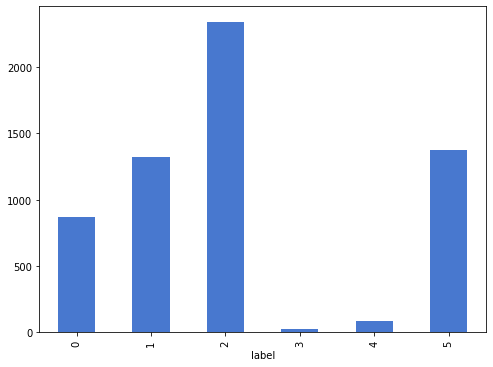

In [ ]:
fig = plt.figure(figsize=(8,6))
df_text_train.groupby('label').transcription.count().plot.bar(ylim=0)
plt.show()

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df_text.transcription).toarray()

labels = df_text.label
print(features.shape)

(7523, 2309)


In [ ]:
x_test

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
5654,Ses03M_impro06_M020,2,0.001865,0.003227,0.001925,0.006962,0.030250,0.168581,0.000032,0.000036
4747,Ses03F_impro02_F032,2,0.001648,0.002250,0.001820,0.004144,0.010406,0.167436,0.000017,0.000010
7853,Ses04M_impro06_M007,2,0.004192,0.006464,0.004363,0.011763,0.085037,0.167940,0.000090,0.000153
5529,Ses03M_impro04_M004,0,0.017947,0.025606,0.018966,0.039864,0.450927,0.168577,0.001004,0.000461
1716,Ses01M_script03_1_M016,1,0.080070,0.103872,0.081055,0.149985,0.361320,0.169400,0.014253,0.018849
...,...,...,...,...,...,...,...,...,...,...
9049,Ses05M_script03_2_F040,0,0.274166,0.333596,0.278433,0.441370,0.399743,0.165289,0.136263,0.079161
5296,Ses03F_script03_1_F002,3,0.010965,0.013614,0.011308,0.019041,0.400231,0.168714,0.000289,0.000249
10015,Ses05F_impro01_M009,2,0.024757,0.031331,0.025865,0.042987,0.444424,0.169225,0.001367,0.001703
2939,Ses02F_script03_2_M034,2,0.033457,0.038380,0.034957,0.043697,0.256727,0.170352,0.001865,0.001285


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)
# count_vect = CountVectorizer()
# x_train_counts = count_vect.fit_transform(x_train)
# tfidf_transformer = TfidfTransformer()
# x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

In [ ]:
y_train = x_train['label']
y_test = x_test['label']

In [ ]:
x_train[x_train['wav_file'] == 'Ses03M_impro02_M025']

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
4973,Ses03M_impro02_M025,2,0.008187,0.010855,0.008468,0.01664,0.53901,0.169062,0.000202,0.000147


Test Set Accuracy =  0.437
Test Set F-score =  0.248
Test Set Precision =  0.273
Test Set Recall =  0.251
Confusion matrix, without normalization
[[ 74  44  97   0   0  16]
 [ 41  57 176   0   0  43]
 [ 31  48 439   0   0  72]
 [  0   0   9   0   0   2]
 [  2   1  17   0   0   0]
 [ 17  21 211   0   0  87]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


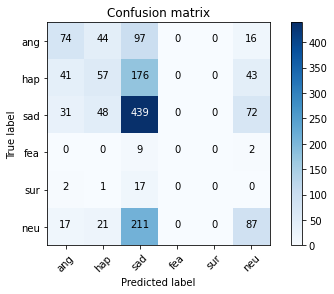

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(x_train.drop(columns=['label','wav_file']), y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test.drop(columns=['label','wav_file']))

# Results
display_results(y_test, pred_probs)

with open('/content/drive/My Drive/IEMOCAP/pre-processed/text_rf_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [ ]:
x_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_train.csv')
x_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_test.csv')

print(x_train.shape)
y_train = x_train['label']
y_test = x_test['label']

In [ ]:
print(x_train.shape, x_test.shape)
cl_weight = dict(pd.Series(x_train['label']).value_counts(normalize=True))
print(dict(pd.Series(x_train['label']).value_counts()))

#del x_train['label']
#del x_test['label']
#del x_train['wav_file']
#del x_test['wav_file']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=1200, min_samples_split=25)
rf_classifier.fit(x_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

with open('/content/drive/My Drive/IEMOCAP/pre-processed/rf_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
x_train_cnn = x_train.drop(columns=['label','wav_file'])
x_test_cnn = x_test.drop(columns=['label','wav_file'])

In [ ]:
x_train_cnn

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
4973,0.008187,0.010855,0.008468,0.016640,0.539010,0.169062,0.000202,0.000147
1302,0.072491,0.090118,0.074097,0.122532,0.454440,0.169127,0.010447,0.008435
1805,0.027375,0.035375,0.028102,0.050833,0.555410,0.169007,0.001753,0.002317
149,0.046962,0.066705,0.047804,0.104420,0.602200,0.169511,0.006278,0.006828
6890,0.012793,0.015674,0.013023,0.021764,0.321008,0.168405,0.000372,0.000329
...,...,...,...,...,...,...,...,...
4403,0.012898,0.018825,0.013616,0.030239,0.616305,0.169031,0.000571,0.000612
5999,0.049667,0.056282,0.051874,0.062176,0.213405,0.168587,0.003879,0.001471
5134,0.014850,0.024299,0.016224,0.040807,0.610008,0.168654,0.000965,0.000292
1470,0.021340,0.025361,0.022095,0.032109,0.419998,0.168681,0.000882,0.001801


In [ ]:
x_train_cnn = x_train_cnn.values.reshape(x_train_cnn.shape[0],x_train_cnn.shape[1],1)
x_test_cnn = x_test_cnn.values.reshape(x_test_cnn.shape[0],x_test_cnn.shape[1],1)

In [ ]:
x_train_cnn

array([[[8.18693707e-03],
        [1.08547071e-02],
        [8.46753986e-03],
        ...,
        [1.69061977e-01],
        [2.02018004e-04],
        [1.47191629e-04]],

       [[7.24911339e-02],
        [9.01175938e-02],
        [7.40974819e-02],
        ...,
        [1.69127311e-01],
        [1.04472022e-02],
        [8.43514230e-03]],

       [[2.73745952e-02],
        [3.53748600e-02],
        [2.81024164e-02],
        ...,
        [1.69007279e-01],
        [1.75319423e-03],
        [2.31690263e-03]],

       ...,

       [[1.48501060e-02],
        [2.42985845e-02],
        [1.62235381e-02],
        ...,
        [1.68654076e-01],
        [9.65311435e-04],
        [2.91668613e-04]],

       [[2.13397407e-02],
        [2.53605630e-02],
        [2.20948805e-02],
        ...,
        [1.68681011e-01],
        [8.82149563e-04],
        [1.80050440e-03]],

       [[1.34897015e-02],
        [2.42029849e-02],
        [1.39253538e-02],
        ...,
        [1.68756002e-01],
        [9.8890

In [ ]:
model = Sequential()
model.add(Conv1D(254,5,padding='same',input_shape=(x_train_cnn[0].shape))) # there are 8 features
model.add(Activation('relu'))
model.add(Conv1D(128,5,padding='same'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128,5,padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128,5,padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 8, 254)            1524      
_________________________________________________________________
activation_11 (Activation)   (None, 8, 254)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 8, 128)            162688    
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 128)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 1, 128)            82048     
_________________________________________________________________
activation_12 (Activation)   (None, 1, 128)           

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
cnn_model_hist = model.fit(x_train_cnn, y_train, batch_size=20,epochs=20, validation_data=(x_test_cnn,y_test))

Epoch 1/20
301/301 [==============================] - 7s 20ms/step - loss: 1.3826 - accuracy: 0.3966 - val_loss: 1.3533 - val_accuracy: 0.4206
Epoch 2/20
301/301 [==============================] - 6s 20ms/step - loss: 1.3396 - accuracy: 0.4103 - val_loss: 1.3599 - val_accuracy: 0.4073
Epoch 3/20
301/301 [==============================] - 6s 19ms/step - loss: 1.3320 - accuracy: 0.4066 - val_loss: 1.3460 - val_accuracy: 0.4199
Epoch 4/20
301/301 [==============================] - 6s 19ms/step - loss: 1.3298 - accuracy: 0.4129 - val_loss: 1.3151 - val_accuracy: 0.4286
Epoch 5/20
301/301 [==============================] - 6s 19ms/step - loss: 1.3243 - accuracy: 0.4136 - val_loss: 1.3164 - val_accuracy: 0.4266
Epoch 6/20
301/301 [==============================] - 6s 20ms/step - loss: 1.3202 - accuracy: 0.4204 - val_loss: 1.3160 - val_accuracy: 0.4286
Epoch 7/20
301/301 [==============================] - 6s 20ms/step - loss: 1.3190 - accuracy: 0.4126 - val_loss: 1.3418 - val_accuracy: 0.4292

In [ ]:
cnn_model_hist

In [ ]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict_new))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [ ]:
x_train_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_train_mfcc.csv')
x_test_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_test_mfcc.csv')

print(x_train_mfcc.shape)
y_train_mfcc = x_train_mfcc['label']
y_test_mfcc = x_test_mfcc['label']

(6018, 182)


In [ ]:
print(x_train_mfcc.shape, x_test_mfcc.shape)
cl_weight_mfcc = dict(pd.Series(x_train_mfcc['label']).value_counts(normalize=True))
print(dict(pd.Series(x_train_mfcc['label']).value_counts()))

#del x_train['label']
#del x_test['label']
#del x_train['wav_file']
#del x_test['wav_file']

(6018, 182) (1505, 182)
{2: 2372, 5: 1371, 1: 1286, 0: 872, 4: 83, 3: 34}


Test Set Accuracy =  0.500
Test Set F-score =  0.307
Test Set Precision =  0.342
Test Set Recall =  0.303
Confusion matrix, without normalization
[[ 87  18 109   0   0  15]
 [ 31 108 150   0   0  61]
 [ 37  36 442   0   0  44]
 [  0   2   3   0   0   1]
 [  4   4   8   0   0   8]
 [  7  23 192   0   0 115]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


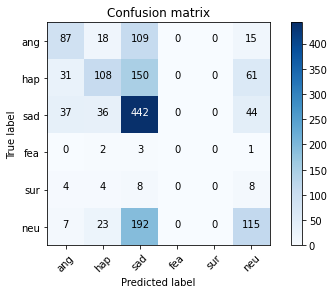

In [ ]:
rf_classifier_mfcc = RandomForestClassifier(n_estimators=1200, min_samples_split=25)
rf_classifier_mfcc.fit(x_train_mfcc.drop(columns=['wav_file','label']), y_train_mfcc)

# Predict
pred_probs_mfcc = rf_classifier_mfcc.predict_proba(x_test_mfcc.drop(columns=['wav_file','label']))

# Results
display_results(y_test_mfcc, pred_probs_mfcc)

with open('/content/drive/My Drive/IEMOCAP/pre-processed/rf_classifier_mfcc.pkl', 'wb') as f:
    pickle.dump(pred_probs_mfcc, f)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D,Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
x_train_mfcc_cnn = x_train_mfcc.drop(columns=['label','wav_file'])
x_test_mfcc_cnn = x_test_mfcc.drop(columns=['label','wav_file'])

In [ ]:
type(x_train_mfcc_cnn)

pandas.core.frame.DataFrame

In [ ]:
x_train_mfcc_cnn = x_train_mfcc_cnn.values.reshape(x_train_mfcc_cnn.shape[0],x_train_mfcc_cnn.shape[1],1)
x_test_mfcc_cnn = x_test_mfcc_cnn.values.reshape(x_test_mfcc_cnn.shape[0],x_test_mfcc_cnn.shape[1],1)

In [ ]:
x_train_mfcc_cnn

array([[[ 0.69938223],
        [-1.96401262],
        [ 0.25166201],
        ...,
        [-0.0353848 ],
        [-0.03540364],
        [-0.03541539]],

       [[ 1.77231654],
        [ 0.60048549],
        [-1.80452134],
        ...,
        [-0.0271964 ],
        [-0.02721424],
        [-0.02722518]],

       [[-0.88349785],
        [-0.02927129],
        [ 2.05666701],
        ...,
        [-0.0357663 ],
        [-0.03578407],
        [-0.03579519]],

       ...,

       [[-1.811963  ],
        [ 1.1809182 ],
        [-0.0964529 ],
        ...,
        [-0.03585737],
        [-0.03587513],
        [-0.03588624]],

       [[-0.0435452 ],
        [-0.97765974],
        [ 0.21496183],
        ...,
        [-0.03585133],
        [-0.035869  ],
        [-0.03588005]],

       [[ 1.16000059],
        [ 0.98044208],
        [-0.79670317],
        ...,
        [-0.03419319],
        [-0.03421188],
        [-0.03422356]]])

In [ ]:
model_mfcc = Sequential()
model_mfcc.add(Conv1D(254,5,padding='same',input_shape=(x_train_mfcc_cnn[0].shape))) # there are 8 features
model_mfcc.add(Activation('relu'))
model_mfcc.add(Conv1D(128,5,padding='same'))
model_mfcc.add(Dropout(0.1))
model_mfcc.add(MaxPooling1D(pool_size=(8)))
model_mfcc.add(Conv1D(128,5,padding='same'))
model_mfcc.add(Activation('relu'))
model_mfcc.add(Conv1D(128,5,padding='same'))
model_mfcc.add(Activation('relu'))
model_mfcc.add(Flatten())
model_mfcc.add(Dense(6))
model_mfcc.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_mfcc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 180, 254)          1524      
_________________________________________________________________
activation (Activation)      (None, 180, 254)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 180, 128)          162688    
_________________________________________________________________
dropout (Dropout)            (None, 180, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 22, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 128)           0

In [ ]:
model_mfcc.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
cnn_model_mfcc_hist = model_mfcc.fit(x_train_mfcc_cnn, y_train_mfcc, batch_size=20,epochs=30, validation_data=(x_test_mfcc_cnn,y_test_mfcc))

Epoch 1/30
301/301 [==============================] - 37s 124ms/step - loss: 1.2040 - accuracy: 0.4998 - val_loss: 1.4087 - val_accuracy: 0.4645
Epoch 2/30
301/301 [==============================] - 37s 124ms/step - loss: 1.1619 - accuracy: 0.5224 - val_loss: 1.4024 - val_accuracy: 0.4645
Epoch 3/30
301/301 [==============================] - 38s 125ms/step - loss: 1.1267 - accuracy: 0.5427 - val_loss: 1.6223 - val_accuracy: 0.4817
Epoch 4/30
301/301 [==============================] - 38s 125ms/step - loss: 1.0778 - accuracy: 0.5656 - val_loss: 1.4428 - val_accuracy: 0.4837
Epoch 5/30
301/301 [==============================] - 37s 124ms/step - loss: 1.0295 - accuracy: 0.5894 - val_loss: 1.7817 - val_accuracy: 0.4771
Epoch 6/30
301/301 [==============================] - 37s 123ms/step - loss: 0.9784 - accuracy: 0.6070 - val_loss: 1.7374 - val_accuracy: 0.4591
Epoch 7/30
301/301 [==============================] - 37s 123ms/step - loss: 0.9148 - accuracy: 0.6391 - val_loss: 1.9744 - val_ac

In [ ]:
cnn_model_mfcc_hist

In [ ]:
### Create an output directory
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

In [ ]:
x_train_mfcc_cnn_2d = np.expand_dims(x_train_mfcc_cnn, -1)
x_test_mfcc_cnn_2d = np.expand_dims(x_test_mfcc_cnn, -1)

In [ ]:
x_train_mfcc_cnn_2d.shape

(6018, 180, 1, 1)

In [ ]:
ip = tf.keras.layers.Input(shape=x_train_mfcc_cnn[0].shape)

model_mfcc_2d = Sequential()
model_mfcc_2d.add(Conv2D(256,5,padding='same',input_shape=(180,1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_mfcc_2d.add(Activation('relu'))
model_mfcc_2d.add(Conv2D(128,5,padding='same'))
model_mfcc_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_mfcc_2d.add(Conv2D(128,5,padding='same'))
model_mfcc_2d.add(Activation('relu'))
model_mfcc_2d.add(Flatten())
model_mfcc_2d.add(Dense(6))
model_mfcc_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

# m_2d = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu')(ip)
# m_2d = tf.keras.layers.MaxPooling2D(pool_size=2)(m_2d)
# m_2d = tf.keras.layers.BatchNormalization()(m_2d)
# m_2d = tf.keras.layers.Dropout(0.2)(m_2d)
# m_2d = tf.keras.layers.Flatten()(m_2d)
# m_2d = tf.keras.layers.Dense(64, activation='relu')(m_2d)
# m_2d = tf.keras.layers.Dense(32, activation='relu')(m_2d)
# op = tf.keras.layers.Dense(6, activation='softmax')(m_2d)
# model_2d = tf.keras.Model(inputs=ip, outputs=op)
# #checkpoint_path = "cp.ckpt"
# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_best_only=True,
#                                                 mode='max',
#                                                 monitor='val_accuracy',
#                                                 verbose=1)

In [ ]:
model_mfcc_2d.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 180, 1, 256)       6656      
_________________________________________________________________
activation_8 (Activation)    (None, 180, 1, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 180, 1, 128)       819328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 180, 1, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 180, 1, 128)       409728    
_________________________________________________________________
activation_9 (Activation)    (None, 180, 1, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23040)            

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model_checkpoint = ModelCheckpoint(filepath=output_dir+'/cnn2d_weights.{epoch:02d}.hdf5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
model_mfcc_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_mfcc_2d = model_mfcc_2d.fit(x_train_mfcc_cnn_2d, 
              y_train_mfcc,
              epochs=10,
              batch_size=32,
              validation_data=(x_test_mfcc_cnn_2d, y_test_mfcc),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/10
189/189 [==============================] - 209s 1s/step - loss: 1.1764 - accuracy: 0.5113 - val_loss: 1.2450 - val_accuracy: 0.4777
Epoch 2/10
189/189 [==============================] - 209s 1s/step - loss: 1.1241 - accuracy: 0.5351 - val_loss: 1.2953 - val_accuracy: 0.4957

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/10
189/189 [==============================] - 208s 1s/step - loss: 1.0378 - accuracy: 0.5748 - val_loss: 1.2519 - val_accuracy: 0.4924

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/10
189/189 [==============================] - 209s 1s/step - loss: 1.0067 - accuracy: 0.5934 - val_loss: 1.2565 - val_accuracy: 0.4957

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


In [ ]:
x_train_mfcc_cnn_2d = np.expand_dims(x_train_mfcc_cnn, -1)
x_test_mfcc_cnn_2d = np.expand_dims(x_test_mfcc_cnn, -1)

In [ ]:
x_train_mfcc_cnn_2d.shape

(6018, 180, 1, 1)

In [ ]:
ip = tf.keras.layers.Input(shape=x_train_mfcc_cnn[0].shape)

In [ ]:
ip

<KerasTensor: shape=(None, 180, 1) dtype=float32 (created by layer 'input_9')>

In [ ]:
ip = tf.keras.layers.Input(shape=x_train_mfcc_cnn[0].shape)

m_2d = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu',input_shape = (180,1))
m_2d = tf.keras.layers.MaxPooling2D(pool_size=2)(m_2d)
m_2d = tf.keras.layers.BatchNormalization()(m_2d)
m_2d = tf.keras.layers.Dropout(0.2)(m_2d)
m_2d = tf.keras.layers.Flatten()(m_2d)
m_2d = tf.keras.layers.Dense(64, activation='relu')(m_2d)
m_2d = tf.keras.layers.Dense(32, activation='relu')(m_2d)
op = tf.keras.layers.Dense(6, activation='softmax')(m_2d)
model_2d = tf.keras.Model(inputs=ip, outputs=op)
#checkpoint_path = "cp.ckpt"
# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_best_only=True,
#                                                 mode='max',
#                                                 monitor='val_accuracy',
#                                                 verbose=1)

TypeError: ignored

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model_checkpoint = ModelCheckpoint(filepath=output_dir+'/cnn2d_weights.{epoch:02d}.hdf5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
model_2d.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_cnn_2d = model_2d.fit(x_train_mfcc_cnn, 
          y_train_mfcc,
          epochs=2,
          batch_size=32,
          validation_data=(x_test_mfcc_cnn, y_test_mfcc),
          callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
### BERT

In [ ]:
### BERT

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 4.0 MB/s 
     |████████████████████████████████| 636 kB 47.2 MB/s 
     |████████████████████████████████| 895 kB 61.0 MB/s 
     |████████████████████████████████| 3.3 MB 36.0 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install --quiet shap==0.39

     |████████████████████████████████| 356 kB 4.0 MB/s 


In [ ]:
pip import shap

ERROR: unknown command "import"


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model_bert = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
df_text_train

,label,transcription
0,2,they want me there two years but i could proba...
1,1,laughter
2,2,they didn t die they killed themselves for eac...
3,2,how do you know he s even thinking about it ?
4,5,i don t know are you like i don t know . are y...
...,...,...
6013,1,i m so stupid . i m like a little kid . i it s...
6014,2,they sting .
6015,5,fuck boston .
6016,2,the national guard is i guess really spread th...


In [ ]:

max_val = 0
for sent in (df_text_train['transcription'].tolist() + df_text_train['transcription'].tolist() + df_text_test['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'distilbert-base-cased'

In [ ]:
MAX_LENGTH = 114

tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

In [ ]:
X_train_text = tokenize(df_text_train['transcription'], tokenizer)
X_test_text = tokenize(df_text_test['transcription'], tokenizer)
X_val_text = tokenize(df_text_test['transcription'], tokenizer)

100%|██████████| 1505/1505 [00:00<00:00, 2261.49it/s]


In [ ]:
## Creating an entry

In [ ]:
config = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config)

input_ids_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer = DistilBERT(input_ids = input_ids_in, attention_mask = input_masks_in)[0]
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer)
X = tf.keras.layers.GlobalMaxPool1D()(X)
X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(6, activation='softmax')(X)

model_bert_local = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

for layer in model_bert_local.layers[:3]:
    layer.trainable = False

model_bert_local.summary()

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_3 (TFDisti TFBaseModelOutput(la 65190912    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_3[0][1

In [ ]:

### Create an output directory
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model_checkpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_train_text = df_text_train['label']
y_test_text = df_text_test['label']

In [ ]:

model_bert_local.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_bert_local.fit(X_train_text, 
                    y_train_text, 
                    epochs = 1,
                    batch_size=16, 
                    validation_data=(X_test_text, y_test_text), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

377/377 [==============================] - 1758s 5s/step - loss: 1.3095 - accuracy: 0.4430 - val_loss: 1.1854 - val_accuracy: 0.5043


In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    print("Lowest Validation Loss: epoch {}".format(np.argmin(val_loss)+1))
    print("Highest Validation Accuracy: epoch {}".format(np.argmax(val_acc)+1))

plot_history(history)

In [ ]:
y_test_probs = model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))

In [ ]:
tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True))) ???

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model_bert(input_ids, attention_mask=attention_mask)

In [ ]:
path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/sentences/wav/'
my_list = []
for subdir,dir,files in os.walk(path):
  for file in files:
    try:
      X, sample_rate = librosa.load(os.path.join(subdir,file), res_type = 'kaiser_fast')
      xfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      file = int(file[6:8])
      arr = xfccs, file 
      my_list.append(arr)
    except ValueError or NoBackendError :
      continue